# **Librerias**

In [1]:
# Importamos 

import scipy
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import minimize
from scipy.spatial import ConvexHull
from matplotlib.patches import Polygon

# Version 

print(f'Numpy Version: {np.__version__}')
print(f'Scipy Version: {scipy.__version__}')
print(f'Matplotlib Version: {matplotlib.__version__}')

Numpy Version: 2.0.2
Scipy Version: 1.13.1
Matplotlib Version: 3.9.4


# **Conos Propios y Desigualdades Generalizadas**

Un **cono** $K \subseteq \mathbb{R}^n$ es llamado un **cono propio** si cumple las siguientes propiedades: 

* $K$ es convexo 

* $K$ es cerrado 

* $K$ es solido (Su interior no es vacio)

* $K$ es apuntado (Tiene una direccion preferida) 

$$x \in K \hspace{0.3cm} \text{y} \hspace{0.03cm} -x \in K \hspace{0.3cm} \text{si y solo si} \hspace{0.3cm} x = 0$$

El **angulo** entre los **vectores generadores** debe ser menor a **180 grados**, porque si no, el **cono** deja de ser apuntado, deja de cumplir esta propiedad $x \in K \hspace{0.2cm} \text{y} \hspace{0.03cm} -x \in K \hspace{0.3cm} \text{si y solo si} \hspace{0.3cm} x = 0$

Un **cono propio** permite definir las **desigualdades generales** en $\mathbb{R}^n$: 

* **Orden Parcial:** 

$$x \preceq_K \hspace{0.01cm} y \hspace{0.2cm} \Longleftrightarrow \hspace{0.2cm} y - x \in K$$

* **Orden Parcial Estricto:** 

$$x \prec_K \hspace{0.01cm} y \hspace{0.2cm} \Longleftrightarrow \hspace{0.2cm} y - x \in \text{int}(K)$$

**Nota:** $\text{int}(K)$ representa el interior del conjunto $K$, es decir, los puntos que están estrictamente dentro del cono, excluyendo el borde.



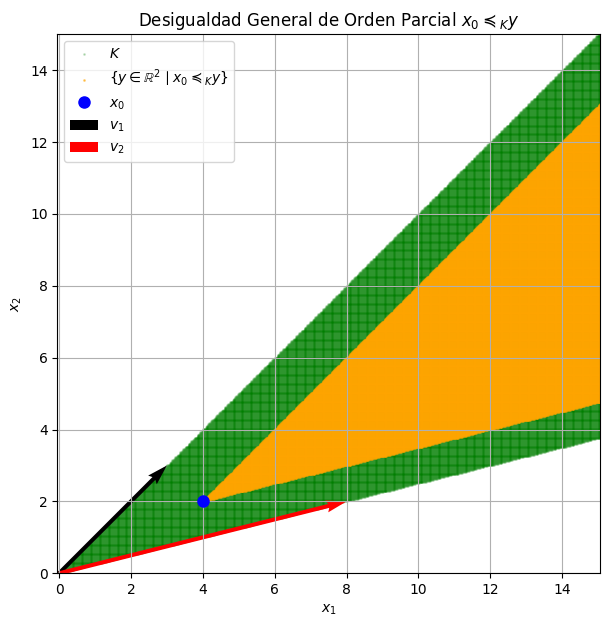

In [2]:
# Definimos los Vectores con los que construimos el conjunto de un Cono Convexo

v1 = np.array([3, 3])
v2 = np.array([8, 2])

# Definimos los Puntos del Espacio

x = np.linspace(0, 25, 1000)
y = np.linspace(0, 25, 1000)
X, Y = np.meshgrid(x, y)

XY = np.stack([X.ravel(), Y.ravel()], axis = 1)

# Obtenemos el Dominio del Cono Convexo

V = np.column_stack((v1, v2)) 
V_inv = np.linalg.inv(V)

thetas = V_inv @ XY.T

mask_cone = (thetas[0, :] >= 0) & (thetas[1, :] >= 0)

Z_cone = mask_cone.reshape(X.shape)

X_cone_points = X[Z_cone]
Y_cone_points = Y[Z_cone]

# Definimos el Vector x 

x0 = np.array([4, 2])

# Obtenemos los Vectores que cumple con la desigualdad de orden parcial

XY_shifted = XY - x0.reshape(1, 2)

thetas_shifted = V_inv @ XY_shifted.T

mask_geneal_inequealities = (thetas_shifted[0, :] >= 0) & (thetas_shifted[1, :] >= 0)

Z_geneal_inequealities = mask_geneal_inequealities.reshape(X.shape)

X_geneal_inequealities= X[Z_geneal_inequealities]
Y_geneal_inequealities = Y[Z_geneal_inequealities]

# Visualizamos

fig, ax = plt.subplots(figsize = (7, 7))

ax.scatter(X_cone_points, Y_cone_points, color = 'green', alpha = 0.2, s = 1, label=r"$K$")
ax.scatter(X_geneal_inequealities, Y_geneal_inequealities, color = 'orange', alpha = 0.5, s = 1, label=r"$\{ y \in \mathbb{R}^2 \mid x_0 \preceq_K y \}$")
ax.plot(x0[0], x0[1], 'bo', label = r"$x_0$", markersize = 8)
ax.quiver(0, 0, v1[0], v1[1], angles = 'xy', scale_units = 'xy', scale = 1, color = 'k', label = r"$v_1$")
ax.quiver(0, 0, v2[0], v2[1], angles = 'xy', scale_units = 'xy', scale = 1, color = 'r', label = r"$v_2$")

ax.set_title(r"Desigualdad General de Orden Parcial $x_0 \preceq_K y$")
ax.axis("equal")
ax.set_xlim(0, 15)
ax.set_ylim(0, 15)
ax.grid(True)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.legend(loc = "upper left")

plt.show()

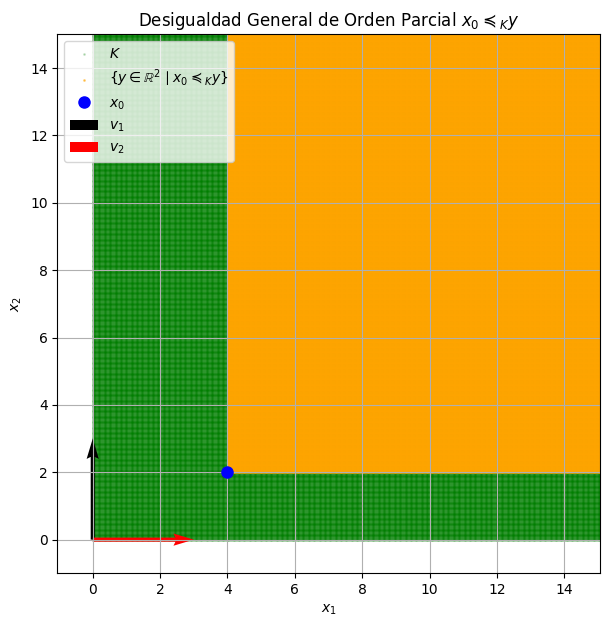

In [3]:
# Definimos los Vectores con los que construimos el conjunto de un Cono Convexo

v1 = np.array([0, 1])
v2 = np.array([1, 0])

# Definimos los Puntos del Espacio

x = np.linspace(0, 25, 1000)
y = np.linspace(0, 25, 1000)
X, Y = np.meshgrid(x, y)

XY = np.stack([X.ravel(), Y.ravel()], axis = 1)

# Obtenemos el Dominio del Cono Convexo

V = np.column_stack((v1, v2)) 
V_inv = np.linalg.inv(V)

thetas = V_inv @ XY.T

mask_cone = (thetas[0, :] >= 0) & (thetas[1, :] >= 0)

Z_cone = mask_cone.reshape(X.shape)

X_cone_points = X[Z_cone]
Y_cone_points = Y[Z_cone]

# Definimos el Vector x 

x0 = np.array([4, 2])

# Obtenemos los Vectores que cumple con la desigualdad de orden parcial

XY_shifted = XY - x0.reshape(1, 2)

thetas_shifted = V_inv @ XY_shifted.T

mask_geneal_inequealities = (thetas_shifted[0, :] >= 0) & (thetas_shifted[1, :] >= 0)

Z_geneal_inequalities = mask_geneal_inequealities.reshape(X.shape)

X_geneal_inequalities= X[Z_geneal_inequalities]
Y_geneal_inequalities = Y[Z_geneal_inequalities]

# Visualizamos

fig, ax = plt.subplots(figsize = (7, 7))

ax.scatter(X_cone_points, Y_cone_points, color = 'green', alpha = 0.2, s = 1, label=r"$K$")
ax.scatter(X_geneal_inequalities, Y_geneal_inequalities, color = 'orange', alpha = 0.5, s = 1, label=r"$\{ y \in \mathbb{R}^2 \mid x_0 \preceq_K y \}$")
ax.plot(x0[0], x0[1], 'bo', label = r"$x_0$", markersize = 8)
ax.quiver(0, 0, v1[0] * 3, v1[1] * 3, angles = 'xy', scale_units = 'xy', scale = 1, color = 'k', label = r"$v_1$")
ax.quiver(0, 0, v2[0] * 3, v2[1] * 3, angles = 'xy', scale_units = 'xy', scale = 1, color = 'r', label = r"$v_2$")

ax.set_title(r"Desigualdad General de Orden Parcial $x_0 \preceq_K y$")
ax.axis("equal")
ax.set_xlim(-1, 15)
ax.set_ylim(-1, 15)
ax.grid(True)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.legend(loc = "upper left")

plt.show()

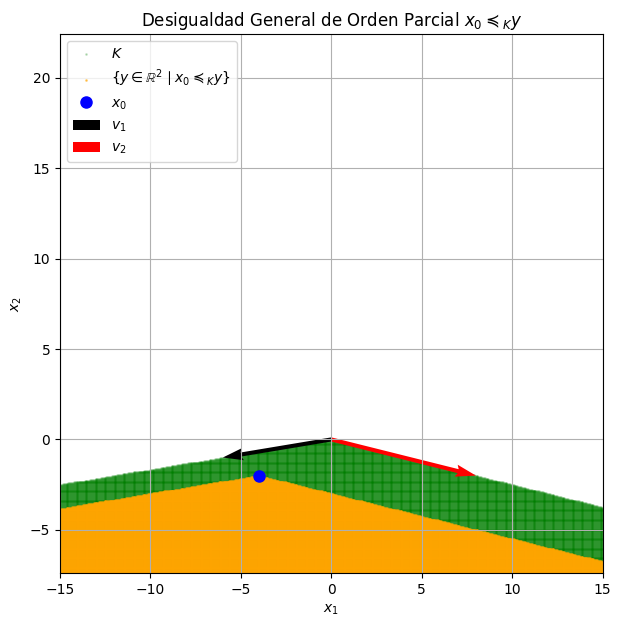

In [4]:
# Definimos los Vectores con los que construimos el conjunto de un Cono Convexo

v1 = np.array([-6, -1])
v2 = np.array([8, -2])

# Definimos los Puntos del Espacio

x = np.linspace(-25, 25, 1000)
y = np.linspace(-25, 25, 1000)
X, Y = np.meshgrid(x, y)

XY = np.stack([X.ravel(), Y.ravel()], axis = 1)

# Obtenemos el Dominio del Cono Convexo

V = np.column_stack((v1, v2)) 
V_inv = np.linalg.inv(V)

thetas = V_inv @ XY.T

mask_cone = (thetas[0, :] >= 0) & (thetas[1, :] >= 0)

Z_cone = mask_cone.reshape(X.shape)

X_cone_points = X[Z_cone]
Y_cone_points = Y[Z_cone]

# Definimos el Vector x 

x0 = np.array([-4, -2])

# Obtenemos los Vectores que cumple con la desigualdad de orden parcial

XY_shifted = XY - x0.reshape(1, 2)

thetas_shifted = V_inv @ XY_shifted.T

mask_geneal_inequealities = (thetas_shifted[0, :] >= 0) & (thetas_shifted[1, :] >= 0)

Z_geneal_inequealities = mask_geneal_inequealities.reshape(X.shape)

X_geneal_inequealities= X[Z_geneal_inequealities]
Y_geneal_inequealities = Y[Z_geneal_inequealities]

# Visualizamos

fig, ax = plt.subplots(figsize = (7, 7))

ax.scatter(X_cone_points, Y_cone_points, color = 'green', alpha = 0.2, s = 1, label=r"$K$")
ax.scatter(X_geneal_inequealities, Y_geneal_inequealities, color = 'orange', alpha = 0.5, s = 1, label=r"$\{ y \in \mathbb{R}^2 \mid x_0 \preceq_K y \}$")
ax.plot(x0[0], x0[1], 'bo', label = r"$x_0$", markersize = 8)
ax.quiver(0, 0, v1[0], v1[1], angles = 'xy', scale_units = 'xy', scale = 1, color = 'k', label = r"$v_1$")
ax.quiver(0, 0, v2[0], v2[1], angles = 'xy', scale_units = 'xy', scale = 1, color = 'r', label = r"$v_2$")

ax.set_title(r"Desigualdad General de Orden Parcial $x_0 \preceq_K y$")
ax.axis("equal")
ax.set_xlim(-15, 15)
ax.set_ylim(0, 15)
ax.grid(True)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.legend(loc = "upper left")

plt.show()

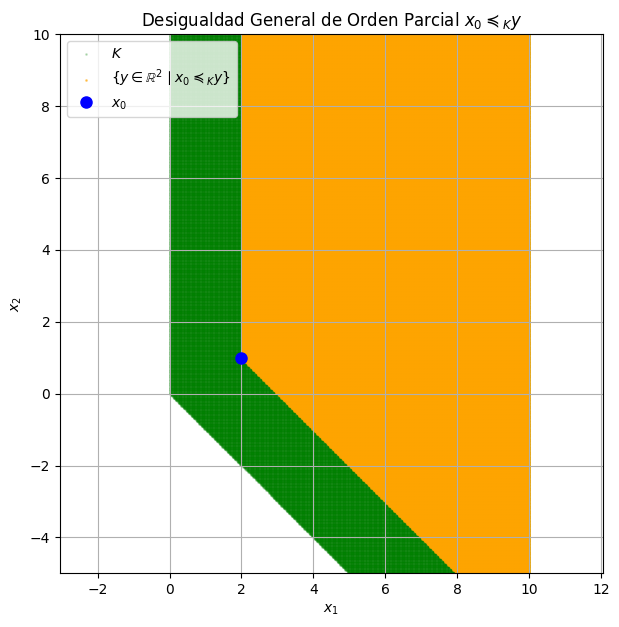

In [5]:
# Definimos los Puntos del Espacio

x = np.linspace(-10, 10, 1000)
y = np.linspace(-10, 10, 1000)
X, Y = np.meshgrid(x, y)

XY = np.stack([X.ravel(), Y.ravel()], axis=1)

# Obtenemos el Dominio del Cono Convexo

t_vals = np.linspace(0, 1, 100)
P_vals = np.array([XY[:, 0] + XY[:, 1] * t for t in t_vals])

mask_cone = np.all(P_vals >= 0, axis = 0)

Z_cone = mask_cone.reshape(X.shape)

X_cone_points = X[Z_cone]
Y_cone_points = Y[Z_cone]

# Definimos el Vector x 

x0 = np.array([2, 1])

# Obtenemos los Vectores que cumple con la desigualdad de orden parcial

XY_shifted = XY - x0.reshape(1, 2)

thetas_shifted = np.array([XY_shifted[:, 0] + XY_shifted[:, 1] * t for t in t_vals])

mask_geneal_inequealities = np.all(thetas_shifted >= 0, axis = 0)
Z_geneal_inequealities = mask_geneal_inequealities.reshape(X.shape)

X_geneal_inequealities = X[Z_geneal_inequealities]
Y_geneal_inequealities = Y[Z_geneal_inequealities]

# Visualizamos

fig, ax = plt.subplots(figsize = (7, 7))

ax.scatter(X_cone_points, Y_cone_points, color = 'green', alpha = 0.2, s = 1, label=r"$K$")
ax.scatter(X_geneal_inequealities, Y_geneal_inequealities, color = 'orange', alpha = 0.5, s = 1, label=r"$\{ y \in \mathbb{R}^2 \mid x_0 \preceq_K y \}$")
ax.plot(x0[0], x0[1], 'bo', label = r"$x_0$", markersize = 8)

ax.set_title(r"Desigualdad General de Orden Parcial $x_0 \preceq_K y$")
ax.axis("equal")
ax.set_xlim(-1, 10)
ax.set_ylim(-5, 10)
ax.grid(True)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.legend(loc = "upper left")

plt.show()

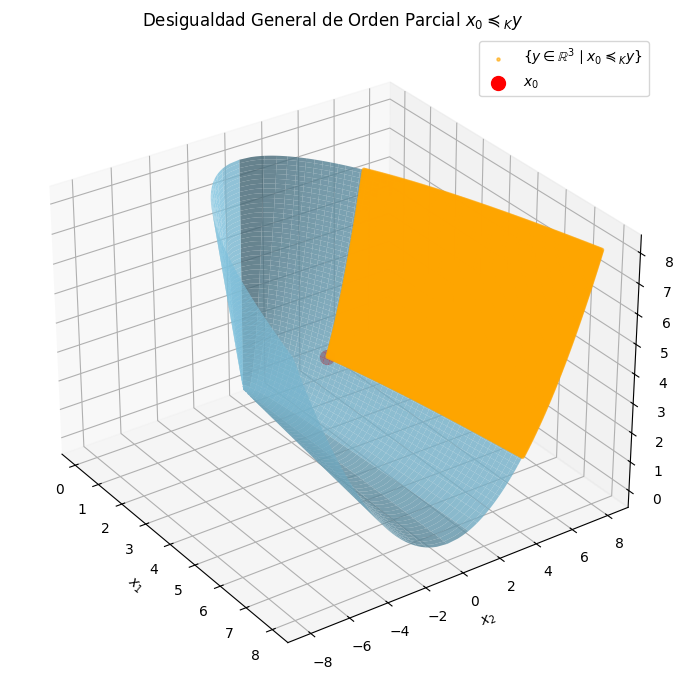

In [6]:
# Definimos la Grilla de Puntos

x = np.linspace(0, 8, 200)
z = np.linspace(0, 8, 200)
X, Z = np.meshgrid(x, z)

# Definimos la frontera del Cono

Y_pos = np.sqrt(X * Z)
Y_neg = -np.sqrt(X * Z)

# Definimos el Vector x 

x0 = np.array([2, 2])
y0 = np.sqrt(x0[0] * x0[1])

# Obtenemos las Matrices que cumple con la desigualdad de orden parcial

mask_geneal_inequealities = (X >= x0[0]) & (Z >= x0[1])

X_geneal_inequalities = X[mask_geneal_inequealities]
Y_geneal_inequalities = Y_pos[mask_geneal_inequealities]
Z_geneal_inequalities = Z[mask_geneal_inequealities]

# Visualizamos

fig = plt.figure(figsize = (10, 7))
ax = fig.add_subplot(111, projection = '3d')

ax.plot_surface(X, Y_pos, Z, color = 'skyblue', alpha = 0.8, edgecolor = 'none')
ax.plot_surface(X, Y_neg, Z, color = 'skyblue', alpha = 0.8, edgecolor = 'none')
ax.scatter(X_geneal_inequalities, Y_geneal_inequalities, Z_geneal_inequalities, color = 'orange', alpha = 0.6, s = 5, label=r'$\{ y \in \mathbb{R}^3 \mid x_0 \preceq_K y \}$')
ax.scatter(x0[0], x0[1], y0, color = 'red', s = 100, label = r"$x_0$", marker = 'o')

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')
ax.set_title(r"Desigualdad General de Orden Parcial $x_0 \preceq_K y$")
ax.view_init(elev = 30, azim = -35)
ax.legend()

plt.tight_layout()
plt.show()

# **Minimum and Minimal Elements**

Un punto $x \in S$ es el **minimo elemento** de $S$, si para todo $y \in S$, se cumple la siguiente **desigualdad general de orden parcial**, en caso de que exista el punto seria un elemento unico: 

$$x \preceq_K \hspace{0.01cm} y \Longleftrightarrow \hspace{0.01cm} y - x \in K$$

* Podemos definir el mismo concepto con notacion de conjuntos

$$S \subseteq x + K$$

Un punto $x \in S$ es el **minimal elemento** de $S$, si no existe ningun otro $y \in S$ que sea distinto a $x$, que cumpla la siguiente **desigualdad general de orden parcial**, En este caso, pueden existir **varios** elementos minimales en el conjunto:

$$y \preceq_K \hspace{0.01cm} x \Longleftrightarrow x = y$$

* Podemos definir el mismo concepto con notacion de conjuntos

$$(x - K) \cap S = \{x\}$$

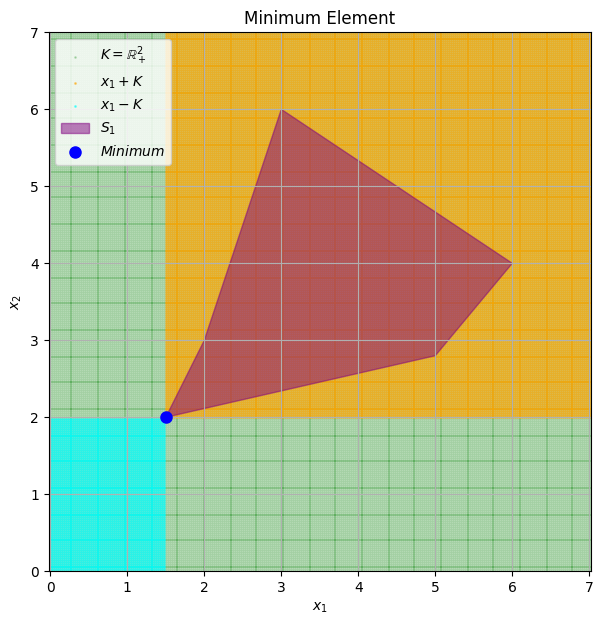

In [7]:
# Definimos los Vectores con los que construimos el conjunto de un Cono Convexo

v1 = np.array([0, 1])
v2 = np.array([1, 0])

# Definimos los Puntos del Espacio

x = np.linspace(0, 25, 1000)
y = np.linspace(0, 25, 1000)
X, Y = np.meshgrid(x, y)

XY = np.stack([X.ravel(), Y.ravel()], axis = 1)

# Obtenemos el Dominio del Cono Convexo

V = np.column_stack((v1, v2)) 
V_inv = np.linalg.inv(V)

thetas = V_inv @ XY.T

mask_cone = (thetas[0, :] >= 0) & (thetas[1, :] >= 0)

Z_cone = mask_cone.reshape(X.shape)

X_cone_points = X[Z_cone]
Y_cone_points = Y[Z_cone]

# Definimos el Poliedro Convexo

vertices = np.array([[1.5, 2], [5, 2.8], [6, 4], [3, 6], [2, 3]])
vertices_closed = np.vstack([vertices, vertices[0]])

# Definimos el Punto Minimo

x_minimum = np.array([1.5, 2])

# Obtenemos los Vectores que cumple con la desigualdad de orden parcial (Minimum)

XY_shifted = XY - x_minimum.reshape(1, 2)

thetas_shifted = V_inv @ XY_shifted.T

mask_geneal_inequealities = (thetas_shifted[0, :] >= 0) & (thetas_shifted[1, :] >= 0)

Z_geneal_inequalities = mask_geneal_inequealities.reshape(X.shape)

X_geneal_inequalities_minimum = X[Z_geneal_inequalities]
Y_geneal_inequalities_minimum = Y[Z_geneal_inequalities]

# Obtenemos los Vectores que cumple con la desigualdad de orden parcial (Minimal)

XY_shifted = XY - x_minimum.reshape(1, 2)

thetas_shifted = V_inv @ XY_shifted.T

mask_geneal_inequealities = (thetas_shifted[0, :] <= 0) & (thetas_shifted[1, :] <= 0)

Z_geneal_inequalities = mask_geneal_inequealities.reshape(X.shape)

X_geneal_inequalities_minimal = X[Z_geneal_inequalities]
Y_geneal_inequalities_minimal = Y[Z_geneal_inequalities]

# Visualizamos

fig, ax = plt.subplots(figsize = (7, 7))

ax.scatter(X_cone_points, Y_cone_points, color = 'green', alpha = 0.2, s = 1, label = r"$K = \mathbb{R}^2_+$")
ax.scatter(X_geneal_inequalities_minimum, Y_geneal_inequalities_minimum, color = 'orange', alpha = 0.5, s = 1, label = r"$x_1 + K$")
ax.scatter(X_geneal_inequalities_minimal, Y_geneal_inequalities_minimal, color = 'cyan', alpha = 0.5, s = 1, label = r"$x_1 - K$")
ax.fill(vertices_closed[:, 0], vertices_closed[:, 1], color = 'purple', alpha = 0.5, label = r"$S_1$")
ax.plot(x_minimum[0], x_minimum[1], 'bo', label = r"$Minimum$", markersize = 8)

ax.set_title(r"Minimum Element")
ax.axis("equal")
ax.set_xlim(0, 7)
ax.set_ylim(0, 7)
ax.grid(True)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.legend(loc = "upper left")

plt.show()

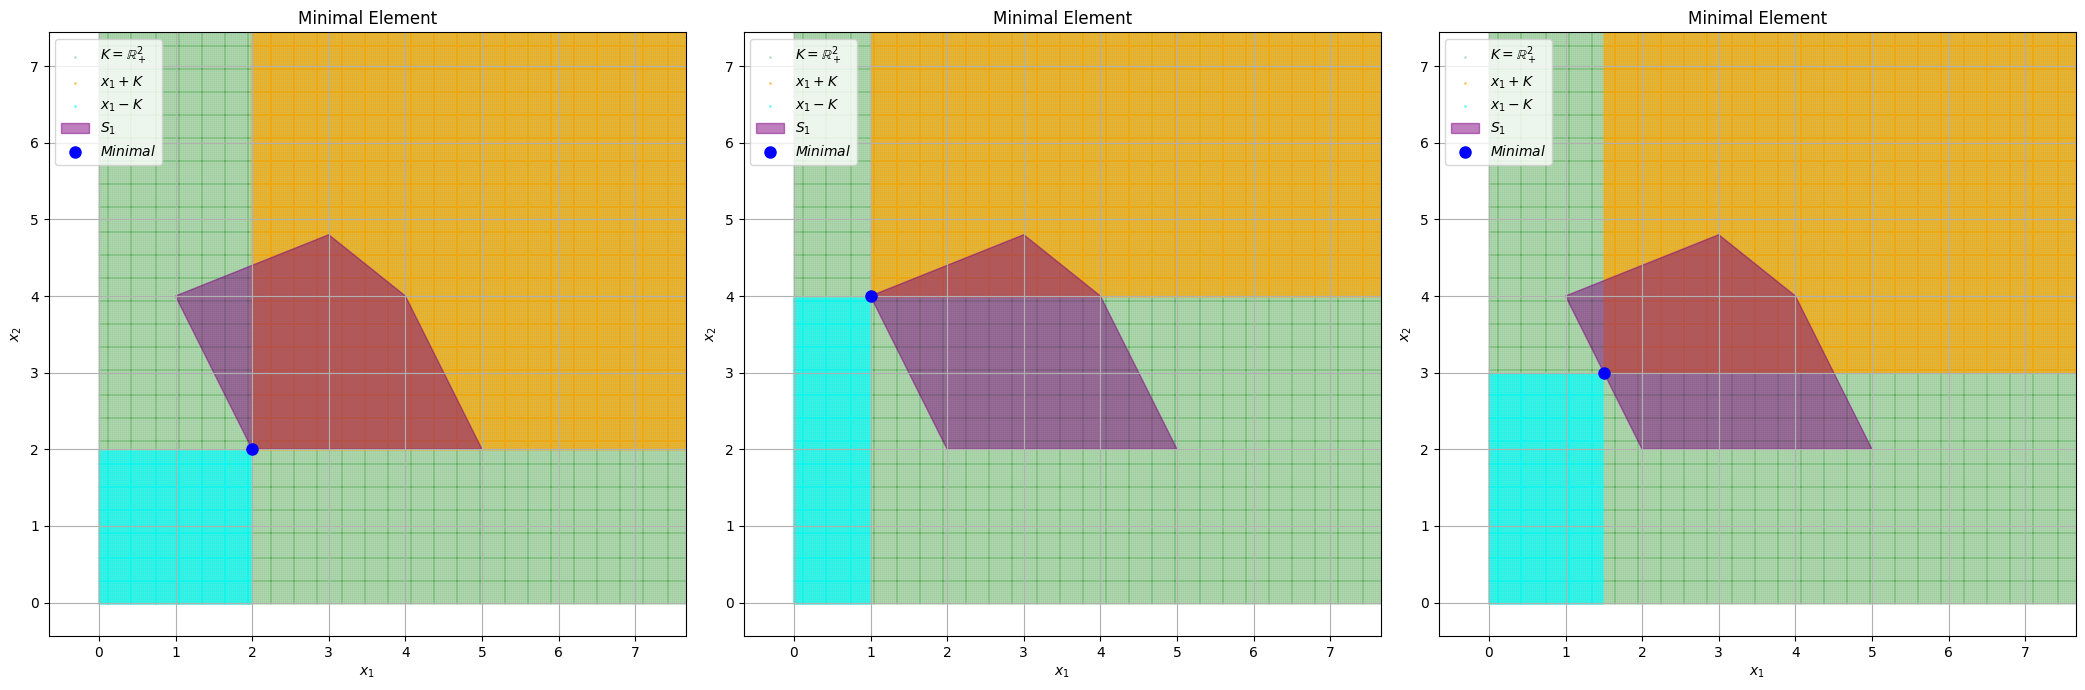

In [8]:
# Definimos los Vectores con los que construimos el conjunto de un Cono Convexo

v1 = np.array([0, 1])
v2 = np.array([1, 0])

# Definimos los Puntos del Espacio

x = np.linspace(0, 25, 1000)
y = np.linspace(0, 25, 1000)
X, Y = np.meshgrid(x, y)

XY = np.stack([X.ravel(), Y.ravel()], axis = 1)

# Obtenemos el Dominio del Cono Convexo

V = np.column_stack((v1, v2)) 
V_inv = np.linalg.inv(V)

thetas = V_inv @ XY.T

mask_cone = (thetas[0, :] >= 0) & (thetas[1, :] >= 0)

Z_cone = mask_cone.reshape(X.shape)

X_cone_points = X[Z_cone]
Y_cone_points = Y[Z_cone]

# Definimos el Poliedro Convexo

vertices = vertices = np.array([[2, 2], [5, 2], [4, 4], [3, 4.8], [1, 4]])
vertices_closed = np.vstack([vertices, vertices[0]])

# Definimos Multiples Puntos Minimal

minimal_points = [np.array([2, 2]), np.array([1, 4]), np.array([1.5, 3])]

# Visualizamos

fig, axes = plt.subplots(1, len(minimal_points), figsize=(7 * len(minimal_points), 7))

for ax, x_minimal in zip(axes, minimal_points):

    # Obtenemos los Vectores que cumple con la desigualdad de orden parcial (Minimum)

    XY_shifted = XY - x_minimal.reshape(1, 2)

    thetas_shifted = V_inv @ XY_shifted.T

    mask_geneal_inequealities = (thetas_shifted[0, :] >= 0) & (thetas_shifted[1, :] >= 0)

    Z_geneal_inequalities = mask_geneal_inequealities.reshape(X.shape)

    X_geneal_inequalities_minimum = X[Z_geneal_inequalities]
    Y_geneal_inequalities_minimum = Y[Z_geneal_inequalities]

    # Obtenemos los Vectores que cumple con la desigualdad de orden parcial (Minimal)

    XY_shifted = XY - x_minimal.reshape(1, 2)

    thetas_shifted = V_inv @ XY_shifted.T

    mask_geneal_inequealities = (thetas_shifted[0, :] <= 0) & (thetas_shifted[1, :] <= 0)

    Z_geneal_inequalities = mask_geneal_inequealities.reshape(X.shape)

    X_geneal_inequalities_minimal = X[Z_geneal_inequalities]
    Y_geneal_inequalities_minimal = Y[Z_geneal_inequalities]

    # Visualizamos
    
    ax.scatter(X_cone_points, Y_cone_points, color = 'green', alpha = 0.2, s = 1, label = r"$K = \mathbb{R}^2_+$")
    ax.scatter(X_geneal_inequalities_minimum, Y_geneal_inequalities_minimum, color = 'orange', alpha = 0.5, s = 1, label = r"$x_1 + K$")
    ax.scatter(X_geneal_inequalities_minimal, Y_geneal_inequalities_minimal, color = 'cyan', alpha = 0.5, s = 1, label = r"$x_1 - K$")
    ax.fill(vertices_closed[:, 0], vertices_closed[:, 1], color = 'purple', alpha = 0.5, label = r"$S_1$")
    ax.plot(x_minimal[0], x_minimal[1], 'bo', label = r"$Minimal$", markersize = 8)

    ax.set_title(f"Minimal Element")
    ax.axis("equal")
    ax.set_xlim(0, 7)
    ax.set_ylim(0, 7)
    ax.grid(True)
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.legend(loc = "upper left")

plt.tight_layout()
plt.show()


# **Hiperplanos de Separacion**

Teniendo dos **conjuntos convexos disjuntos no vacios** $C$ y $D$, existe un **hiperplano no tirvial** $a \neq 0$ que separa los conjuntos:

$$\text{H} = \{x \hspace{0.1cm} | \hspace{0.1cm} a^T x = b\}$$

En donde se cumple que el existe un medio espacio $\{x \hspace{0.1cm} | \hspace{0.1cm} a^T x \leq b\}$ para todo $x \in C$ y otro medio espacio $\{x \hspace{0.1cm} | \hspace{0.1cm} a^T x \geq b\}$ para todo $x \in D$:



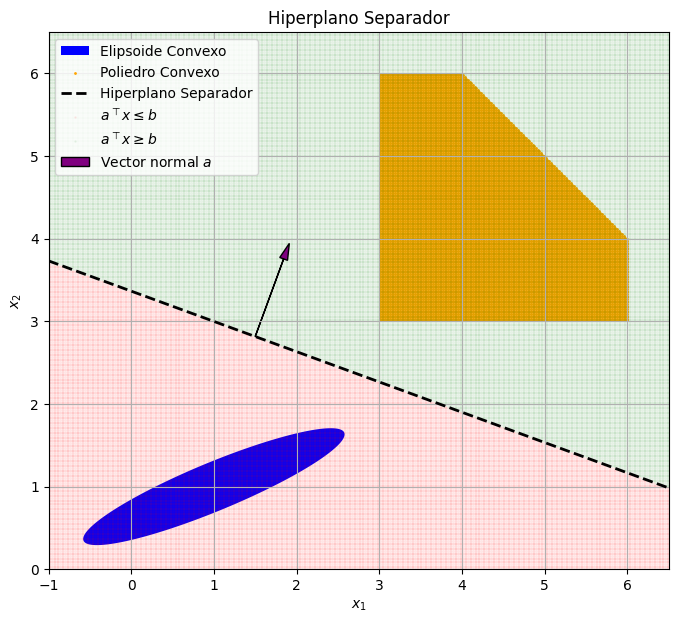

In [9]:
# Creamos los Puntos de la Bola Unitaria

theta = np.linspace(0, 2 * np.pi, 400)
x_unit = np.cos(theta)
y_unit = np.sin(theta)

# Definimos la Funcion Afin para Transformar la Bola Unitaria a un Elipsoide

L = np.array([[1.5, 0.5], [0.5, 0.5]])
ellipse = L @ np.vstack([x_unit, y_unit])

# Desplazamos el Elipsoide

ellipse[0] += 1
ellipse[1] += 1
C = ellipse.T

# Definimos el Poliedro Convexo
 
A_poly = np.array([[-1,  0], [ 0, -1], [ 1,  0], [ 0,  1], [ 1,  1]])
b_poly = np.array([-3, -3, 6, 6, 10])

# Creamos los Puntos del Poliedro

x = np.linspace(-1, 7, 400)
y = np.linspace(-1, 7, 400)

X, Y = np.meshgrid(x, y)

Z = np.vstack([X.ravel(), Y.ravel()])

# Nos quedamos con los puntos que satisfacen al Poliedro

feasible = np.all(A_poly @ Z <= b_poly[:, np.newaxis], axis=0)
D = Z[:, feasible].T

# Optimizacion para encontrar el mejor hiperplano separador

delta = 0.1
w0 = np.array([1.0, 1.0, 0.0])

def objective(wb):
    a = wb[:2]
    
    return np.dot(a, a)

def constraints_fun(wb):
    
    a = wb[:2]
    b = wb[2]
    cons = []

    for x_i in C:
        cons.append((b - delta) - np.dot(a, x_i))

    for y_j in D:
        cons.append(np.dot(a, y_j) - (b + delta))

    return np.array(cons)

res = minimize(fun = objective, x0 = w0, constraints={'type': 'ineq', 'fun': constraints_fun}, method = 'SLSQP', options = {'ftol': 1e-9, 'disp': False, 'maxiter': 1000})

# Obtenemos los valores del Hiperplano Separador

a_val = res.x[:2]
b_val = res.x[2]

xx = np.linspace(-1, 7, 400)
yy = (b_val - a_val[0] * xx) / a_val[1]

# Obtenemos los Medio Espacios

grid_x, grid_y = np.meshgrid(np.linspace(-1, 7, 400), np.linspace(-1, 7, 400))
grid_points = np.stack([grid_x.ravel(), grid_y.ravel()], axis = 1)

lhs_vals = grid_points @ a_val
mask_below = lhs_vals <= b_val
mask_above = lhs_vals >= b_val

# Obtenemos el Vector Normal al Hiperplano Separador

mid_x = 1.5
mid_y = (b_val - a_val[0] * mid_x) / a_val[1]
norm_scale = 1.0 / np.linalg.norm(a_val)

# Visualizamos 

fig, ax = plt.subplots(figsize = (8, 8))

ax.fill(C[:, 0], C[:, 1], 'blue', label = 'Elipsoide Convexo')
ax.scatter(D[:, 0], D[:, 1], color = 'orange', s = 1, label = 'Poliedro Convexo')
ax.plot(xx, yy, 'k--', linewidth = 2, label = 'Hiperplano Separador')
ax.scatter(grid_points[mask_below, 0], grid_points[mask_below, 1], color = 'red', alpha = 0.05, s = 1, label = r'$a^\top x \leq b$')
ax.scatter(grid_points[mask_above, 0], grid_points[mask_above, 1], color = 'green', alpha = 0.05, s = 1, label = r'$a^\top x \geq b$')
ax.arrow(mid_x, mid_y, norm_scale * a_val[0], norm_scale * a_val[1], head_width = 0.1, head_length = 0.2, fc = 'purple', label = 'Vector normal $a$')

ax.set_aspect('equal')
ax.grid(True)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_title('Hiperplano Separador')
ax.set_xlim(-1, 6.5) 
ax.set_ylim(0, 6.5)
ax.legend()

plt.show()

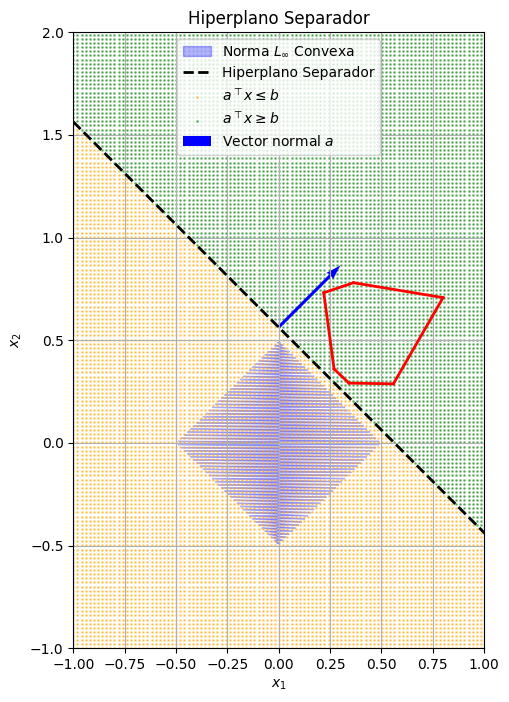

In [10]:
# Definimos diez Puntos del Conjunto Convexo C

points = np.array([[0.8008693, 0.70798883], [0.55882203, 0.28797608], [0.27001222, 0.36033711], [0.34245723, 0.29180877], [0.54115658, 0.59909294], 
                  [0.34803634, 0.39364561], [0.4969766, 0.51125372], [0.21976778, 0.73170492], [0.51566247, 0.61272171], [0.36489481, 0.78037703]])

# Calculamos el Casco Convexo con thetas entre [0, 1]

hull = ConvexHull(points)

# Definimos el Centro y el Radio de la Bola

xc = np.array([0, 0])
r = 0.5

# Creamos los Puntos de la Bola

x = np.linspace(-r-1, r+1, 200)
y = np.linspace(-r-1, r+1, 200)

X, Y = np.meshgrid(x, y)

# Definimos la norma 

B1 = np.abs(X) + np.abs(Y) <= r

# Optimizacion para encontrar el mejor hiperplano separador

w0 = np.array([1.0, 1.0, 0.0])

def objective(wb):
    a = wb[:2]
    return np.dot(a, a)

def constraints_fun(wb):
    a = wb[:2]
    b = wb[2]
    cons = []
    
    for i in range(X.shape[0]):
        for j in range(Y.shape[1]):
            if B1[i, j]:
                cons.append((b - 0.1) - np.dot(a, np.array([X[i, j], Y[i, j]])))
    
    for y_j in points:
        cons.append(np.dot(a, y_j) - (b + 0.1))
    
    return np.array(cons)

res = minimize(fun = objective, x0 = w0, constraints = {'type': 'ineq', 'fun': constraints_fun}, method = 'SLSQP', options = {'ftol': 1e-9, 'disp': False, 'maxiter': 1000})

# Obtenemos los valores del Hiperplano Separador

a_val = res.x[:2]
b_val = res.x[2]

xx = np.linspace(-1, 7, 400)
yy = (b_val - a_val[0] * xx) / a_val[1]

# Obtenemos los Medio Espacios

grid_x, grid_y = np.meshgrid(np.linspace(-1, 7, 400), np.linspace(-1, 7, 400))
grid_points = np.stack([grid_x.ravel(), grid_y.ravel()], axis = 1)

lhs_vals = grid_points @ a_val
mask_below = lhs_vals <= b_val
mask_above = lhs_vals >= b_val

# Obtenemos el Vector Normal al Hiperplano Separador

mid_x = 0.0
mid_y = (b_val - a_val[0] * mid_x) / a_val[1]
norm_scale = 1.0 / np.linalg.norm(a_val)

# Visualizamos

fig, ax = plt.subplots(figsize = (8, 8))

ax.fill(X[B1], Y[B1], color = 'blue', alpha = 0.3, label = 'Norma $L_\infty$ Convexa')
ax.plot(xx, yy, 'k--', linewidth = 2, label = 'Hiperplano Separador')
ax.scatter(grid_points[mask_below, 0], grid_points[mask_below, 1], color = 'orange', alpha = 0.45, s = 1, label = r'$a^\top x \leq b$')
ax.scatter(grid_points[mask_above, 0], grid_points[mask_above, 1], color = 'green', alpha = 0.45, s = 1, label = r'$a^\top x \geq b$')
ax.quiver(mid_x, mid_y, a_val[0], a_val[1], angles = 'xy', scale_units = 'xy', scale = 5, color = 'blue', label = 'Vector normal $a$')

for simplex in hull.simplices:
    ax.plot(points[simplex, 0], points[simplex, 1], 'r-', lw = 2)
    
ax.set_aspect('equal')
ax.grid(True)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_ylim(-1, 2)
ax.set_xlim(-1, 1)
ax.set_title('Hiperplano Separador')
ax.legend()

plt.show()

# **Hiperplanos de Soporte**

Sea $C \subseteq \mathbb{R}^n$ un **conjunto convexo**, y $x_{0}$ un punto en la frontera del conjunto $C$

$$x_{0} \in \operatorname{bd} C$$

Existe un **hiperplano no trivial** $a \neq 0$  que satisface $a^T x \leq a^T x_{0}$ para todo $x \in C$. Es decir que el punto $x_{0}$ y el conjunto convexo $C$ estan separados por el hiperplano $\{x \hspace{0.1cm} | \hspace{0.1cm} a^T x = a^T x_{0}\}$

$$\text{H} = \{x \hspace{0.1cm} | \hspace{0.1cm} a^T x = a^T x_{0}\}$$

La interpretacion geometrica es que el hiperplano de soporte $\{x \hspace{0.1cm} | \hspace{0.1cm} a^T x = a^T x_{0}\}$ es **tangente** a $C$ en $x_{0}$ y por lo tanto el **medio espacio** $\{x \hspace{0.1cm} | \hspace{0.1cm} a^T x \leq a^T x_{0}\}$ contiene a $C$



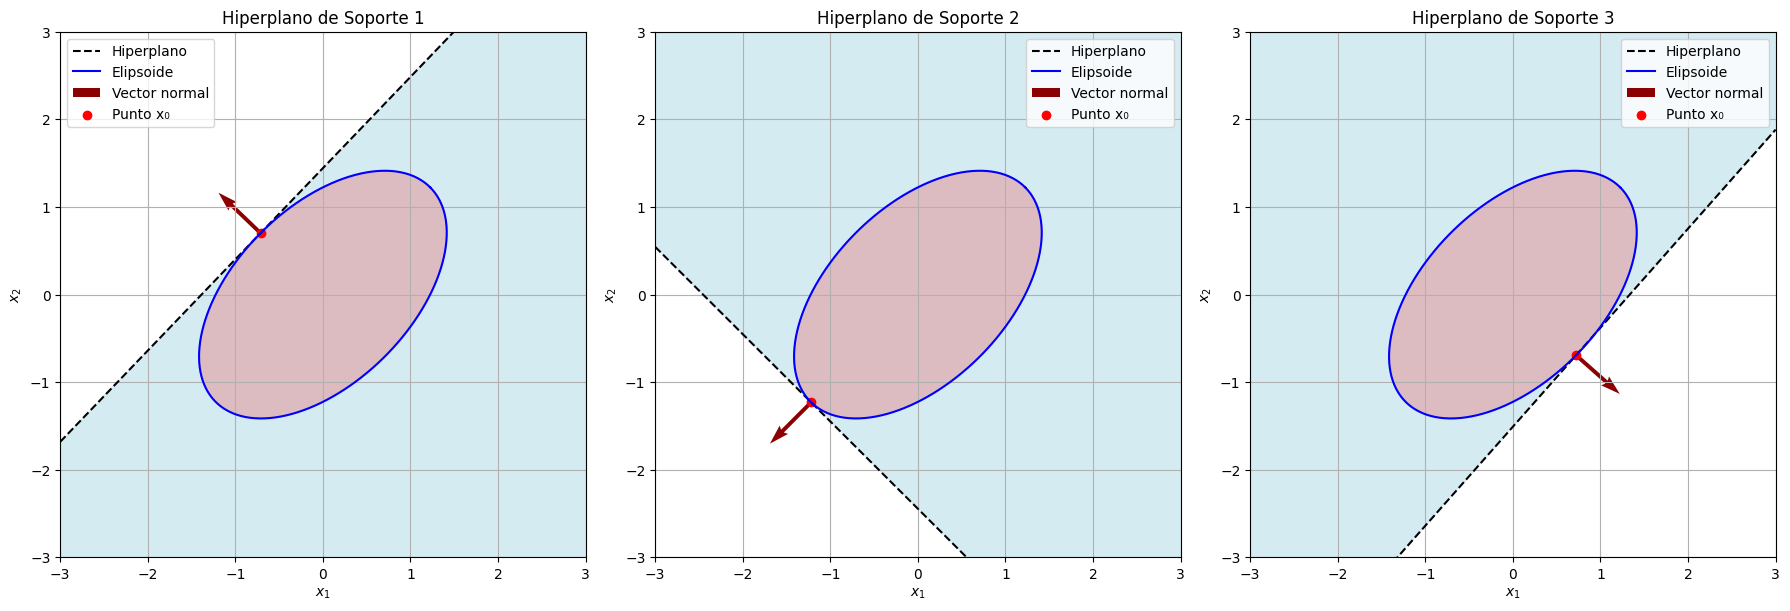

In [11]:
# Definimos la Matriz P (Simétrica, Definida Positiva)

P = np.array([[2, 1], [1, 2]])

# Calculamos los Eigenvalores y los Eigenvectores

eigenvalues, eigenvectors = np.linalg.eig(P)

# Creamos los Puntos de la Bola Unitaria

theta = np.linspace(0, 2 * np.pi, 400)
x = np.cos(theta)
y = np.sin(theta)

# Transformamos los Puntos de la Bola Unitaria a un Elipsoide

elipsoide_x = eigenvectors[0, 0] * np.sqrt(eigenvalues[0]) * x + eigenvectors[0, 1] * np.sqrt(eigenvalues[1]) * y
elipsoide_y = eigenvectors[1, 0] * np.sqrt(eigenvalues[0]) * x + eigenvectors[1, 1] * np.sqrt(eigenvalues[1]) * y

# Elegimos tres puntos fijos en la frontera del elipsoide

indices = [100, 200, 300]
puntos_x0 = np.array([elipsoide_x[indices], elipsoide_y[indices]]).T

# Rango de Visualizacion

x_range = np.linspace(-3, 3, 400)

# Visualizamos

fig, axs = plt.subplots(1, 3, figsize = (18, 6))

for i, x0 in enumerate(puntos_x0):

    normal = 2 * P @ x0
    normal = normal / np.linalg.norm(normal)

    aTx0 = normal @ x0
    y_range = (-normal[0] * x_range + aTx0) / normal[1]

    XX, YY = np.meshgrid(np.linspace(-3, 3, 400), np.linspace(-3, 3, 400))
    Z = normal[0] * XX + normal[1] * YY
    mask = Z <= aTx0

    axs[i].contourf(XX, YY, mask, levels = [0.5, 1], colors = 'lightblue', alpha = 0.5)
    axs[i].plot(x_range, y_range, 'k--', label = f'Hiperplano')
    axs[i].plot(elipsoide_x, elipsoide_y, color = 'blue', label = 'Elipsoide')
    axs[i].fill(elipsoide_x, elipsoide_y, color = 'red', alpha = 0.2)
    axs[i].quiver(x0[0], x0[1], normal[0], normal[1], angles = 'xy', scale_units = 'xy', scale = 1.5, color = 'darkred', label = 'Vector normal')
    axs[i].scatter(x0[0], x0[1], color = 'red', label = 'Punto x₀')

    axs[i].set_aspect('equal')
    axs[i].set_xlim(-3, 3)
    axs[i].set_ylim(-3, 3)
    axs[i].set_xlabel('$x_1$')
    axs[i].set_ylabel('$x_2$')
    axs[i].set_title(f'Hiperplano de Soporte {i+1}')
    axs[i].grid(True)
    axs[i].legend()

plt.tight_layout()
plt.show()

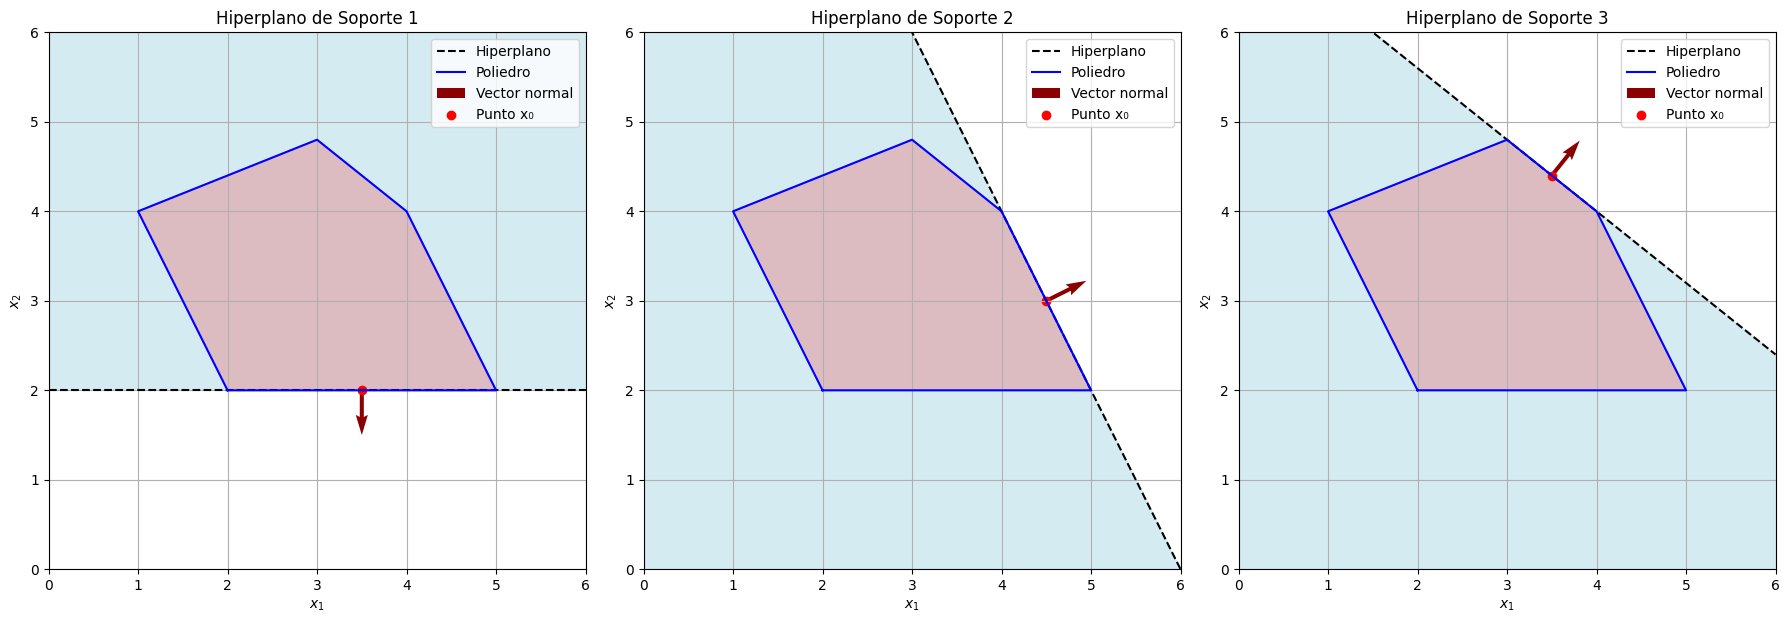

In [12]:
# Definimos el Poliedro Convexo

vertices = np.array([[2, 2], [5, 2], [4, 4], [3, 4.8], [1, 4]])

vertices_closed = np.vstack([vertices, vertices[0]])

# Elegimos tres puntos fijos en la frontera del Poliedro

indices = [0, 1, 2]
puntos_x0 = (vertices[indices] + vertices[(np.array(indices) + 1) % len(vertices)]) / 2

# Rango de Visualizacion

x_range = np.linspace(0, 6, 400)

# Visualización

fig, axs = plt.subplots(1, 3, figsize = (18, 6))

for i, x0 in enumerate(puntos_x0):
    
    p1 = vertices[indices[i]]
    p2 = vertices[(indices[i] + 1) % len(vertices)]
    tangente = p2 - p1

    normal = np.array([-tangente[1], tangente[0]])
    normal = normal / np.linalg.norm(normal)

    aTx0 = normal @ x0
    y_range = (-normal[0] * x_range + aTx0) / normal[1]

    XX, YY = np.meshgrid(np.linspace(0, 6, 400), np.linspace(0, 6, 400))
    Z = normal[0] * XX + normal[1] * YY
    mask = Z >= aTx0
    
    polygon = Polygon(vertices, closed = True, color='red', alpha = 0.2)

    axs[i].contourf(XX, YY, mask, levels=[0.5, 1], colors = 'lightblue', alpha = 0.5)
    axs[i].plot(x_range, y_range, 'k--', label = f'Hiperplano')
    axs[i].plot(*vertices_closed.T, color = 'blue', label = 'Poliedro')
    axs[i].quiver(x0[0], x0[1], -normal[0], -normal[1], angles = 'xy', scale_units = 'xy', scale=2, color = 'darkred', label = 'Vector normal')
    axs[i].add_patch(polygon)
    axs[i].scatter(*x0, color = 'red', label = 'Punto x₀')
    
    axs[i].set_aspect('equal')
    axs[i].set_xlim(0, 6)
    axs[i].set_ylim(0, 6)
    axs[i].set_xlabel('$x_1$')
    axs[i].set_ylabel('$x_2$')
    axs[i].set_title(f'Hiperplano de Soporte {i+1}')
    axs[i].grid(True)
    axs[i].legend()

plt.tight_layout()
plt.show()

# **Conos Duales**


### **Conos Duales**

Dado un **cono** $K \subseteq \mathbb{R}^n$. Su **cono dual** se define como: 

$$K^{*} = \{y \hspace{0.1cm}|\hspace{0.05cm} x^T y \geq 0  \hspace{0.1cm} \text{para todo} \hspace{0.1cm} x \in K\}$$

El **cono dual** $K^*$ siempre es convexo y cerrado, incluso si el **cono original** $K$ no lo es. 

**Se definen algunas propiedades:**

* $K^{*}$ es cerrado y convexo

* $K_{1} \subseteq K_{2}$ implica $K_{2}^* \subseteq K_{1}^*$

* Si $K$ no tiene el interior vacio, entonces $K^*$ es apuntado

* Si $K$ es apuntado, entonces $K^*$ no tiene el interior vacio

**Nota:** Geometricamente $y \in K^*$ si y solo si $-y$ es **normal** a algun **hiperplano de soporte** de $K$ que pasa por el **origen** y que deja a $K$ completamente de un solo lado

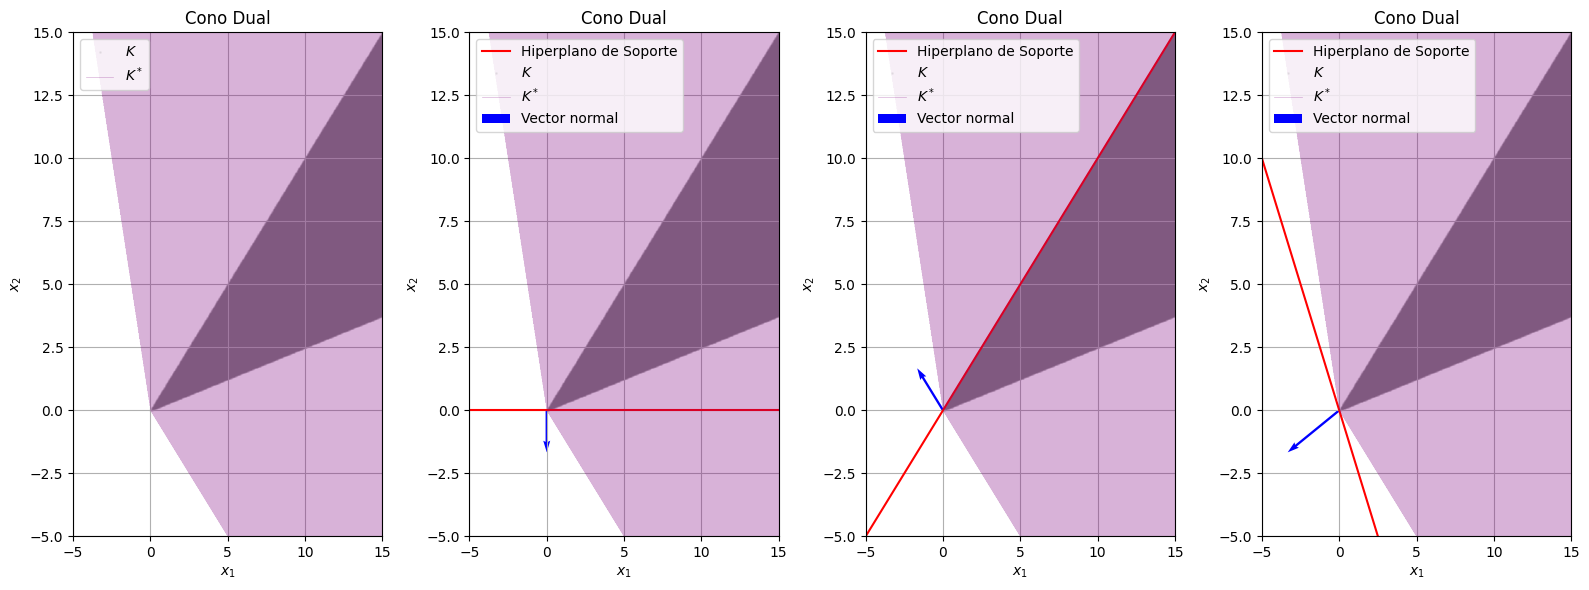

In [13]:
# Definimos los Vectores con los que construimos el conjunto de un Cono Convexo

v1 = np.array([3, 3])
v2 = np.array([8, 2])

# Definimos los Puntos del Espacio

x = np.linspace(0, 25, 1000)
y = np.linspace(0, 25, 1000)
X, Y = np.meshgrid(x, y)

XY = np.stack([X.ravel(), Y.ravel()], axis = 1)

# Obtenemos el Dominio del Cono Convexo

V = np.column_stack((v1, v2)) 
V_inv = np.linalg.inv(V)

thetas = V_inv @ XY.T

mask_cone = (thetas[0, :] >= 0) & (thetas[1, :] >= 0)

Z_cone = mask_cone.reshape(X.shape)

X_cone_points = X[Z_cone]
Y_cone_points = Y[Z_cone]

# Obtenemos el Dominio del Cono Dual

x_dual = np.linspace(-15, 15, 1000)
y_dual = np.linspace(-15, 15, 1000)
X_dual, Y_dual = np.meshgrid(x_dual, y_dual)

XY_dual = np.stack([X_dual.ravel(), Y_dual.ravel()], axis = 1)

mask_dual_cone = (XY_dual @ v1 >= 0) & (XY_dual @ v2 >= 0)

Z_dual_cone = mask_dual_cone.reshape(X_dual.shape)

X_dual_points = X_dual[Z_dual_cone]
Y_dual_points = Y_dual[Z_dual_cone]

# Hiperplanos de Soporte

def plot_hyperplane(ax, y_vector, label, color = 'red'):
    
    if y_vector[1] == 0:
        ax.axvline(x=0, color = color, label = label)
    else:
        x_vals = np.linspace(-5, 25, 100)
        y_vals = (-y_vector[0] * x_vals) / y_vector[1]
        ax.plot(x_vals, y_vals, color = color, label = label)

# Visualizamos 

fig, axes = plt.subplots(1, 4, figsize = (16, 6))

axes[0].scatter(X_cone_points, Y_cone_points, color = 'gray', alpha = 0.1, s = 1, label = r"$K$")
axes[0].plot(X_dual_points, Y_dual_points, color = 'purple', alpha = 0.3, linestyle = '-', linewidth = 0.5, label = r"$K^*$")
axes[0].set_title("Cono Dual")
axes[0].set_xlim(-5, 15)
axes[0].set_ylim(-5, 15)
axes[0].set_xlabel('$x_1$')
axes[0].set_ylabel('$x_2$')
axes[0].grid(True)
axes[0].legend(loc = "upper left")

plot_hyperplane(axes[1], np.array([0, 5]), label = r"Hiperplano de Soporte", color = 'red')
axes[1].scatter(X_cone_points, Y_cone_points, color = 'gray', alpha = 0.1, s = 1, label = r"$K$")
axes[1].plot(X_dual_points, Y_dual_points, color = 'purple', alpha = 0.3, linestyle = '-', linewidth = 0.5, label = r"$K^*$")
axes[1].quiver(0, 0, 0, -5, angles = 'xy', scale_units = 'xy', scale = 3, color = 'blue', label = 'Vector normal')
axes[1].set_title("Cono Dual")
axes[1].set_xlim(-5, 15)
axes[1].set_ylim(-5, 15)
axes[1].set_xlabel('$x_1$')
axes[1].set_ylabel('$x_2$')
axes[1].grid(True)
axes[1].legend(loc = "upper left")

plot_hyperplane(axes[2], np.array([5, -5]), label = r"Hiperplano de Soporte", color = 'red')
axes[2].scatter(X_cone_points, Y_cone_points, color = 'gray', alpha = 0.1, s = 1, label = r"$K$")
axes[2].plot(X_dual_points, Y_dual_points, color = 'purple', alpha = 0.3, linestyle = '-', linewidth = 0.5, label = r"$K^*$")
axes[2].quiver(0, 0, -5, 5, angles = 'xy', scale_units = 'xy', scale = 3, color = 'blue', label = 'Vector normal')
axes[2].set_title("Cono Dual")
axes[2].set_xlim(-5, 15)
axes[2].set_ylim(-5, 15)
axes[2].set_xlabel('$x_1$')
axes[2].set_ylabel('$x_2$')
axes[2].grid(True)
axes[2].legend(loc = "upper left")

plot_hyperplane(axes[3], np.array([10, 5]), label = r"Hiperplano de Soporte", color = 'red')
axes[3].scatter(X_cone_points, Y_cone_points, color = 'gray', alpha = 0.1, s = 1, label = r"$K$")
axes[3].plot(X_dual_points, Y_dual_points, color = 'purple', alpha = 0.3, linestyle = '-', linewidth = 0.5, label = r"$K^*$")
axes[3].quiver(0, 0, -10, -5, angles = 'xy', scale_units = 'xy', scale = 3, color = 'blue', label = 'Vector normal')
axes[3].set_title("Cono Dual")
axes[3].set_xlim(-5, 15)
axes[3].set_ylim(-5, 15)
axes[3].set_xlabel('$x_1$')
axes[3].set_ylabel('$x_2$')
axes[3].grid(True)
axes[3].legend(loc = "upper left")

plt.tight_layout()
plt.show()

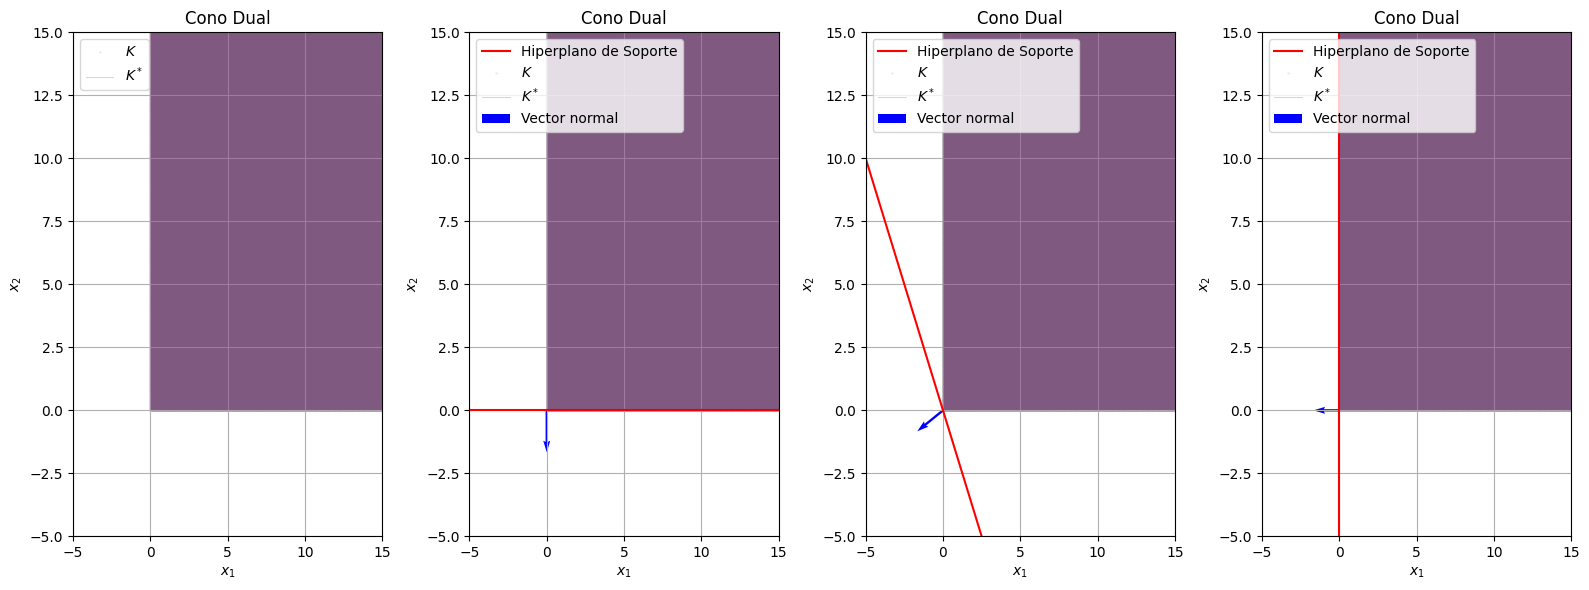

In [14]:
# Definimos los Vectores con los que construimos el conjunto de un Cono Convexo

v1 = np.array([0, 1])
v2 = np.array([1, 0])

# Definimos los Puntos del Espacio

x = np.linspace(0, 25, 1000)
y = np.linspace(0, 25, 1000)
X, Y = np.meshgrid(x, y)

XY = np.stack([X.ravel(), Y.ravel()], axis = 1)

# Obtenemos el Dominio del Cono Convexo

V = np.column_stack((v1, v2)) 
V_inv = np.linalg.inv(V)

thetas = V_inv @ XY.T

mask_cone = (thetas[0, :] >= 0) & (thetas[1, :] >= 0)

Z_cone = mask_cone.reshape(X.shape)

X_cone_points = X[Z_cone]
Y_cone_points = Y[Z_cone]

# Obtenemos el Dominio del Cono Dual

x_dual = np.linspace(-15, 15, 1000)
y_dual = np.linspace(-15, 15, 1000)
X_dual, Y_dual = np.meshgrid(x_dual, y_dual)

XY_dual = np.stack([X_dual.ravel(), Y_dual.ravel()], axis = 1)

mask_dual_cone = (XY_dual @ v1 >= 0) & (XY_dual @ v2 >= 0)

Z_dual_cone = mask_dual_cone.reshape(X_dual.shape)

X_dual_points = X_dual[Z_dual_cone]
Y_dual_points = Y_dual[Z_dual_cone]

# Hiperplanos de Soporte

def plot_hyperplane(ax, y_vector, label, color = 'red'):
    
    if y_vector[1] == 0:
        ax.axvline(x=0, color = color, label = label)
    else:
        x_vals = np.linspace(-5, 25, 100)
        y_vals = (-y_vector[0] * x_vals) / y_vector[1]
        ax.plot(x_vals, y_vals, color = color, label = label)

# Visualizamos 

fig, axes = plt.subplots(1, 4, figsize = (16, 6))

axes[0].scatter(X_cone_points, Y_cone_points, color = 'gray', alpha = 0.1, s = 1, label = r"$K$")
axes[0].plot(X_dual_points, Y_dual_points, color = 'purple', alpha = 0.3, linestyle = '-', linewidth = 0.5, label = r"$K^*$")
axes[0].set_title("Cono Dual")
axes[0].set_xlim(-5, 15)
axes[0].set_ylim(-5, 15)
axes[0].set_xlabel('$x_1$')
axes[0].set_ylabel('$x_2$')
axes[0].grid(True)
axes[0].legend(loc = "upper left")

plot_hyperplane(axes[1], np.array([0, 5]), label = r"Hiperplano de Soporte", color = 'red')
axes[1].scatter(X_cone_points, Y_cone_points, color = 'gray', alpha = 0.1, s = 1, label = r"$K$")
axes[1].plot(X_dual_points, Y_dual_points, color = 'purple', alpha = 0.3, linestyle = '-', linewidth = 0.5, label = r"$K^*$")
axes[1].quiver(0, 0, 0, -5, angles = 'xy', scale_units = 'xy', scale = 3, color = 'blue', label = 'Vector normal')
axes[1].set_title("Cono Dual")
axes[1].set_xlim(-5, 15)
axes[1].set_ylim(-5, 15)
axes[1].set_xlabel('$x_1$')
axes[1].set_ylabel('$x_2$')
axes[1].grid(True)
axes[1].legend(loc = "upper left")

plot_hyperplane(axes[2], np.array([5, 2.5]), label = r"Hiperplano de Soporte", color = 'red')
axes[2].scatter(X_cone_points, Y_cone_points, color = 'gray', alpha = 0.1, s = 1, label = r"$K$")
axes[2].plot(X_dual_points, Y_dual_points, color = 'purple', alpha = 0.3, linestyle = '-', linewidth = 0.5, label = r"$K^*$")
axes[2].quiver(0, 0, -5, -2.5, angles = 'xy', scale_units = 'xy', scale = 3, color = 'blue', label = 'Vector normal')
axes[2].set_title("Cono Dual")
axes[2].set_xlim(-5, 15)
axes[2].set_ylim(-5, 15)
axes[2].set_xlabel('$x_1$')
axes[2].set_ylabel('$x_2$')
axes[2].grid(True)
axes[2].legend(loc = "upper left")

plot_hyperplane(axes[3], np.array([5, 0]), label = r"Hiperplano de Soporte", color = 'red')
axes[3].scatter(X_cone_points, Y_cone_points, color = 'gray', alpha = 0.1, s = 1, label = r"$K$")
axes[3].plot(X_dual_points, Y_dual_points, color = 'purple', alpha = 0.3, linestyle = '-', linewidth = 0.5, label = r"$K^*$")
axes[3].quiver(0, 0, -5, 0, angles = 'xy', scale_units = 'xy', scale = 3, color = 'blue', label = 'Vector normal')
axes[3].set_title("Cono Dual")
axes[3].set_xlim(-5, 15)
axes[3].set_ylim(-5, 15)
axes[3].set_xlabel('$x_1$')
axes[3].set_ylabel('$x_2$')
axes[3].grid(True)
axes[3].legend(loc = "upper left")

plt.tight_layout()
plt.show()

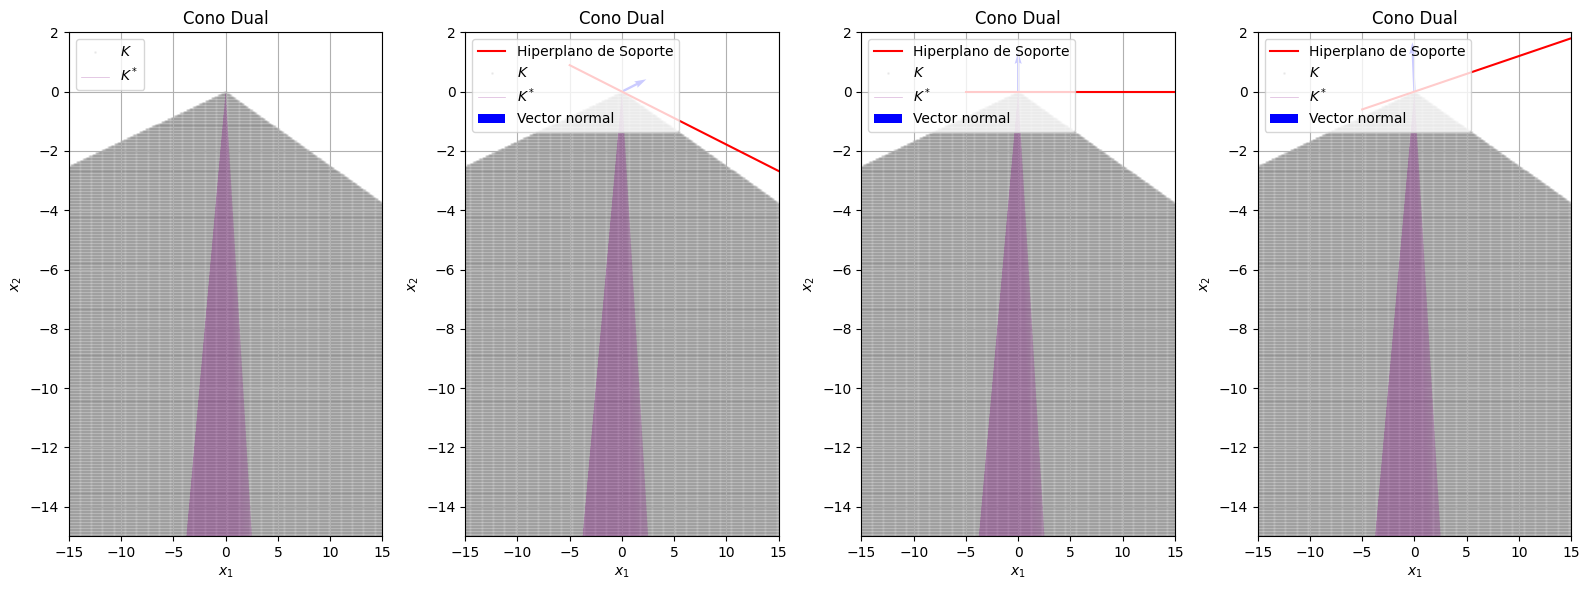

In [15]:
# Definimos los Vectores con los que construimos el conjunto de un Cono Convexo

v1 = np.array([-6, -1])
v2 = np.array([8, -2])

# Definimos los Puntos del Espacio

x = np.linspace(-25, 25, 1000)
y = np.linspace(-25, 25, 1000)
X, Y = np.meshgrid(x, y)

XY = np.stack([X.ravel(), Y.ravel()], axis = 1)

# Obtenemos el Dominio del Cono Convexo

V = np.column_stack((v1, v2)) 
V_inv = np.linalg.inv(V)

thetas = V_inv @ XY.T

mask_cone = (thetas[0, :] >= 0) & (thetas[1, :] >= 0)

Z_cone = mask_cone.reshape(X.shape)

X_cone_points = X[Z_cone]
Y_cone_points = Y[Z_cone]

# Obtenemos el Dominio del Cono Dual

x_dual = np.linspace(-15, 15, 1000)
y_dual = np.linspace(-15, 15, 1000)
X_dual, Y_dual = np.meshgrid(x_dual, y_dual)

XY_dual = np.stack([X_dual.ravel(), Y_dual.ravel()], axis = 1)

mask_dual_cone = (XY_dual @ v1 >= 0) & (XY_dual @ v2 >= 0)

Z_dual_cone = mask_dual_cone.reshape(X_dual.shape)

X_dual_points = X_dual[Z_dual_cone]
Y_dual_points = Y_dual[Z_dual_cone]

# Hiperplanos de Soporte

def plot_hyperplane(ax, y_vector, label, color = 'red'):
    
    if y_vector[1] == 0:
        ax.axvline(x=0, color = color, label = label)
    else:
        x_vals = np.linspace(-5, 25, 100)
        y_vals = (-y_vector[0] * x_vals) / y_vector[1]
        ax.plot(x_vals, y_vals, color = color, label = label)

# Visualizamos 

fig, axes = plt.subplots(1, 4, figsize = (16, 6))

axes[0].scatter(X_cone_points, Y_cone_points, color = 'gray', alpha = 0.1, s = 1, label = r"$K$")
axes[0].plot(X_dual_points, Y_dual_points, color = 'purple', alpha = 0.3, linestyle = '-', linewidth = 0.5, label = r"$K^*$")
axes[0].set_title("Cono Dual")
axes[0].set_xlim(-15, 15)
axes[0].set_ylim(-15, 2)
axes[0].set_xlabel('$x_1$')
axes[0].set_ylabel('$x_2$')
axes[0].grid(True)
axes[0].legend(loc = "upper left")

plot_hyperplane(axes[1], np.array([-2.5, -14]), label = r"Hiperplano de Soporte", color = 'red')
axes[1].scatter(X_cone_points, Y_cone_points, color = 'gray', alpha = 0.1, s = 1, label = r"$K$")
axes[1].plot(X_dual_points, Y_dual_points, color = 'purple', alpha = 0.3, linestyle = '-', linewidth = 0.5, label = r"$K^*$")
axes[1].quiver(0, 0, 14, 2.5, angles = 'xy', scale_units = 'xy', scale = 6, color = 'blue', label = 'Vector normal')
axes[1].set_title("Cono Dual")
axes[1].set_xlim(-15, 15)
axes[1].set_ylim(-15, 2)
axes[1].set_xlabel('$x_1$')
axes[1].set_ylabel('$x_2$')
axes[1].grid(True)
axes[1].legend(loc = "upper left")

plot_hyperplane(axes[2], np.array([0, -8]), label = r"Hiperplano de Soporte", color = 'red')
axes[2].scatter(X_cone_points, Y_cone_points, color = 'gray', alpha = 0.1, s = 1, label = r"$K$")
axes[2].plot(X_dual_points, Y_dual_points, color = 'purple', alpha = 0.3, linestyle = '-', linewidth = 0.5, label = r"$K^*$")
axes[2].quiver(0, 0, 0, 8, angles = 'xy', scale_units = 'xy', scale = 6, color = 'blue', label = 'Vector normal')
axes[2].set_title("Cono Dual")
axes[2].set_xlim(-15, 15)
axes[2].set_ylim(-15, 2)
axes[2].set_xlabel('$x_1$')
axes[2].set_ylabel('$x_2$')
axes[2].grid(True)
axes[2].legend(loc = "upper left")

plot_hyperplane(axes[3], np.array([1.2, -10]), label = r"Hiperplano de Soporte", color = 'red')
axes[3].scatter(X_cone_points, Y_cone_points, color = 'gray', alpha = 0.1, s = 1, label = r"$K$")
axes[3].plot(X_dual_points, Y_dual_points, color = 'purple', alpha = 0.3, linestyle = '-', linewidth = 0.5, label = r"$K^*$")
axes[3].quiver(0, 0, -1.2, 10, angles = 'xy', scale_units = 'xy', scale = 6, color = 'blue', label = 'Vector normal')
axes[3].set_title("Cono Dual")
axes[3].set_xlim(-15, 15)
axes[3].set_ylim(-15, 2)
axes[3].set_xlabel('$x_1$')
axes[3].set_ylabel('$x_2$')
axes[3].grid(True)
axes[3].legend(loc = "upper left")

plt.tight_layout()
plt.show()

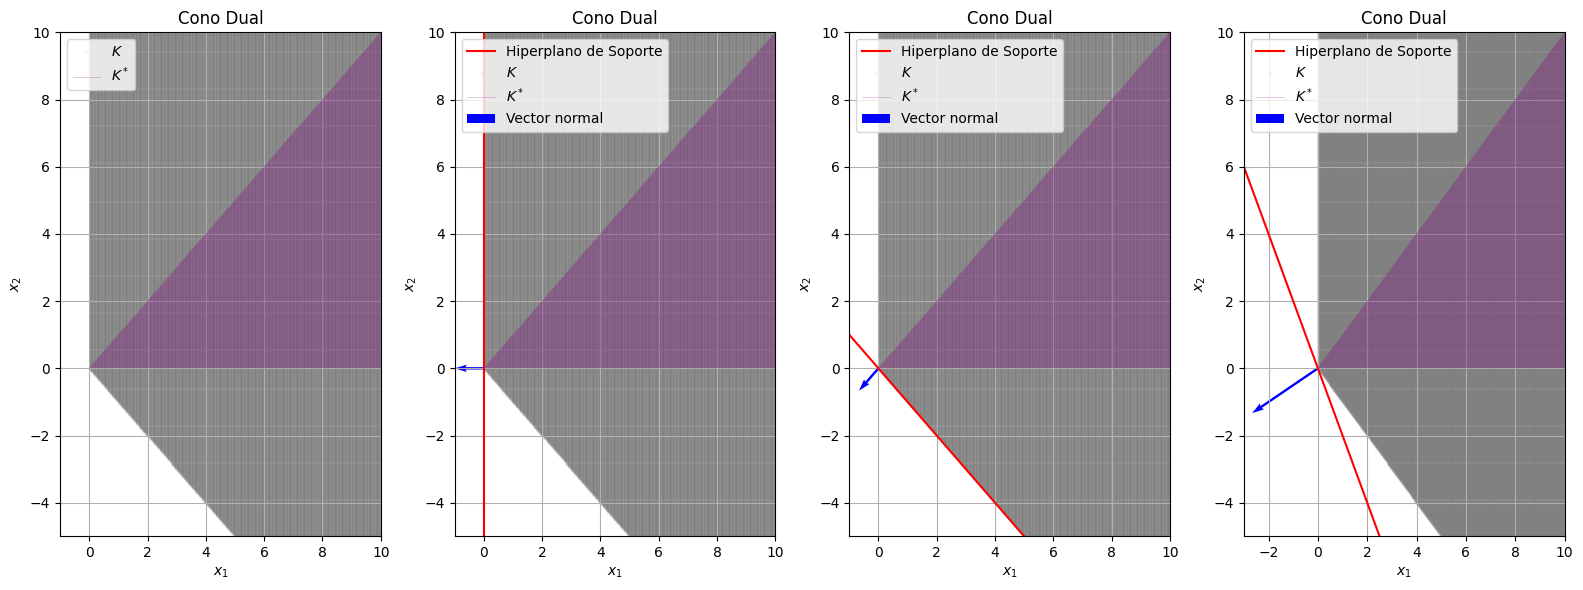

In [16]:
# Definimos los Puntos del Espacio

x = np.linspace(-10, 10, 1000)
y = np.linspace(-10, 10, 1000)
X, Y = np.meshgrid(x, y)

XY = np.stack([X.ravel(), Y.ravel()], axis=1)

# Obtenemos el Dominio del Cono Convexo

t_vals = np.linspace(0, 1, 100)
P_vals = np.array([XY[:, 0] + XY[:, 1] * t for t in t_vals])

mask_cone = np.all(P_vals >= 0, axis = 0)

Z_cone = mask_cone.reshape(X.shape)

X_cone_points = X[Z_cone]
Y_cone_points = Y[Z_cone]

# Obtenemos el Dominio del Cono Dual

v1 = np.array([2, -2]) 
v2 = np.array([0, 2]) 

x_dual = np.linspace(-15, 15, 1000)
y_dual = np.linspace(-15, 15, 1000)
X_dual, Y_dual = np.meshgrid(x_dual, y_dual)

XY_dual = np.stack([X_dual.ravel(), Y_dual.ravel()], axis = 1)

mask_dual_cone = (XY_dual @ v1 >= 0) & (XY_dual @ v2 >= 0)

Z_dual_cone = mask_dual_cone.reshape(X_dual.shape)

X_dual_points = X_dual[Z_dual_cone]
Y_dual_points = Y_dual[Z_dual_cone]

# Hiperplanos de Soporte

def plot_hyperplane(ax, y_vector, label, color = 'red'):
    
    if y_vector[1] == 0:
        ax.axvline(x=0, color = color, label = label)
    else:
        x_vals = np.linspace(-5, 25, 100)
        y_vals = (-y_vector[0] * x_vals) / y_vector[1]
        ax.plot(x_vals, y_vals, color = color, label = label)

# Visualizamos 

fig, axes = plt.subplots(1, 4, figsize = (16, 6))

axes[0].scatter(X_cone_points, Y_cone_points, color = 'gray', alpha = 0.1, s = 1, label = r"$K$")
axes[0].plot(X_dual_points, Y_dual_points, color = 'purple', alpha = 0.3, linestyle = '-', linewidth = 0.5, label = r"$K^*$")
axes[0].set_title("Cono Dual")
axes[0].set_xlim(-1, 10)
axes[0].set_ylim(-5, 10)
axes[0].set_xlabel('$x_1$')
axes[0].set_ylabel('$x_2$')
axes[0].grid(True)
axes[0].legend(loc = "upper left")

plot_hyperplane(axes[1], np.array([3, 0]), label = r"Hiperplano de Soporte", color = 'red')
axes[1].scatter(X_cone_points, Y_cone_points, color = 'gray', alpha = 0.1, s = 1, label = r"$K$")
axes[1].plot(X_dual_points, Y_dual_points, color = 'purple', alpha = 0.3, linestyle = '-', linewidth = 0.5, label = r"$K^*$")
axes[1].quiver(0, 0, -3, 0, angles = 'xy', scale_units = 'xy', scale = 3, color = 'blue', label = 'Vector normal')
axes[1].set_title("Cono Dual")
axes[1].set_xlim(-1, 10)
axes[1].set_ylim(-5, 10)
axes[1].set_xlabel('$x_1$')
axes[1].set_ylabel('$x_2$')
axes[1].grid(True)
axes[1].legend(loc = "upper left")

plot_hyperplane(axes[2], np.array([2, 2]), label = r"Hiperplano de Soporte", color = 'red')
axes[2].scatter(X_cone_points, Y_cone_points, color = 'gray', alpha = 0.1, s = 1, label = r"$K$")
axes[2].plot(X_dual_points, Y_dual_points, color = 'purple', alpha = 0.3, linestyle = '-', linewidth = 0.5, label = r"$K^*$")
axes[2].quiver(0, 0, -2, -2, angles = 'xy', scale_units = 'xy', scale = 3, color = 'blue', label = 'Vector normal')
axes[2].set_title("Cono Dual")
axes[2].set_xlim(-1, 10)
axes[2].set_ylim(-5, 10)
axes[2].set_xlabel('$x_1$')
axes[2].set_ylabel('$x_2$')
axes[2].grid(True)
axes[2].legend(loc = "upper left")

plot_hyperplane(axes[3], np.array([8, 4]), label = r"Hiperplano de Soporte", color = 'red')
axes[3].scatter(X_cone_points, Y_cone_points, color = 'gray', alpha = 0.1, s = 1, label = r"$K$")
axes[3].plot(X_dual_points, Y_dual_points, color = 'purple', alpha = 0.3, linestyle = '-', linewidth = 0.5, label = r"$K^*$")
axes[3].quiver(0, 0, -8, -4, angles = 'xy', scale_units = 'xy', scale = 3, color = 'blue', label = 'Vector normal')
axes[3].set_title("Cono Dual")
axes[3].set_xlim(-3, 10)
axes[3].set_ylim(-5, 10)
axes[3].set_xlabel('$x_1$')
axes[3].set_ylabel('$x_2$')
axes[3].grid(True)
axes[3].legend(loc = "upper left")

plt.tight_layout()
plt.show()

# **Desigualdades Generalizadas Duales**

Si **K** es un **cono propio**, el **cono dual** $K^*$ tambien es **propio**, asi que induce desigualdades generalizadas duales 

* **Orden Parcial:** 

$$x \preceq_K \hspace{0.01cm} y \hspace{0.2cm} \text{si solo si} \hspace{0.2cm} \lambda^T x \leq \lambda^T y \hspace{0.2cm} \text{para todo} \hspace{0.2cm} \lambda  \succeq_{K^*} 0$$

* **Orden Parcial Estricto:** 

$$x \prec_K \hspace{0.01cm} y \hspace{0.2cm} \text{si solo si} \hspace{0.2cm} \lambda^T x < \lambda^T y \hspace{0.2cm} \text{para todo} \hspace{0.2cm} \lambda  \succeq_{K^*} 0, \hspace{0.1cm} \lambda \neq 0$$



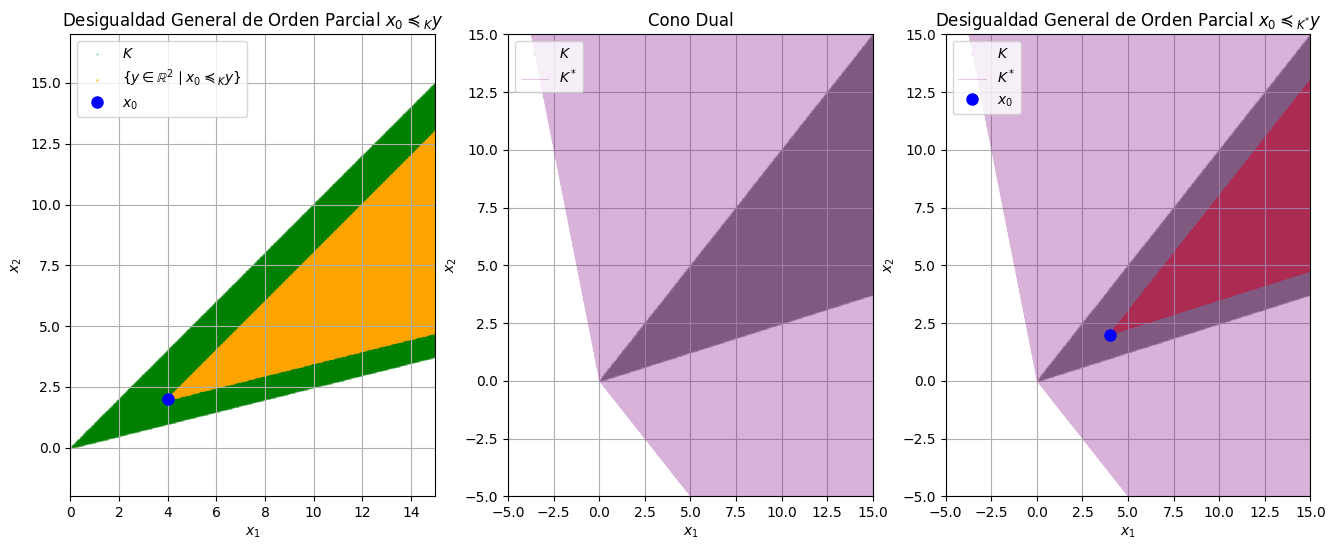

In [17]:
# Definimos los Vectores con los que construimos el conjunto de un Cono Convexo

v1 = np.array([3, 3])
v2 = np.array([8, 2])

# Definimos los Puntos del Espacio

x = np.linspace(0, 25, 1000)
y = np.linspace(0, 25, 1000)
X, Y = np.meshgrid(x, y)

XY = np.stack([X.ravel(), Y.ravel()], axis = 1)

# Obtenemos el Dominio del Cono Convexo

V = np.column_stack((v1, v2)) 
V_inv = np.linalg.inv(V)

thetas = V_inv @ XY.T

mask_cone = (thetas[0, :] >= 0) & (thetas[1, :] >= 0)

Z_cone = mask_cone.reshape(X.shape)

X_cone_points = X[Z_cone]
Y_cone_points = Y[Z_cone]

# Definimos el Vector x 

x0 = np.array([4, 2])

# Obtenemos los Vectores que cumple con la desigualdad de orden parcial

XY_shifted = XY - x0.reshape(1, 2)

thetas_shifted = V_inv @ XY_shifted.T

mask_geneal_inequealities = (thetas_shifted[0, :] >= 0) & (thetas_shifted[1, :] >= 0)

Z_geneal_inequealities = mask_geneal_inequealities.reshape(X.shape)

X_geneal_inequealities= X[Z_geneal_inequealities]
Y_geneal_inequealities = Y[Z_geneal_inequealities]

# Obtenemos el Dominio del Cono Dual

x_dual = np.linspace(-15, 15, 1000)
y_dual = np.linspace(-15, 15, 1000)
X_dual, Y_dual = np.meshgrid(x_dual, y_dual)

XY_dual = np.stack([X_dual.ravel(), Y_dual.ravel()], axis = 1)

mask_dual_cone = (XY_dual @ v1 >= 0) & (XY_dual @ v2 >= 0)

Z_dual_cone = mask_dual_cone.reshape(X_dual.shape)

X_dual_points = X_dual[Z_dual_cone]
Y_dual_points = Y_dual[Z_dual_cone]

# Obtenemos los Vectores que cumple con la desigualdad de orden parcial del cono dual

mask_dual_cone_same_grid = (XY @ v1 >= 0) & (XY @ v2 >= 0)

mask_combined = mask_dual_cone_same_grid & mask_geneal_inequealities

Z_combined = mask_combined.reshape(X.shape)

# Visualizamos 

fig, axes = plt.subplots(1, 3, figsize = (16, 6))

axes[0].scatter(X_cone_points, Y_cone_points, color = 'green', alpha = 0.2, s = 1, label = r"$K$")
axes[0].scatter(X_geneal_inequealities, Y_geneal_inequealities, color = 'orange', alpha = 0.5, s = 1, label=r"$\{ y \in \mathbb{R}^2 \mid x_0 \preceq_K y \}$")
axes[0].plot(x0[0], x0[1], 'bo', label = r"$x_0$", markersize = 8)
axes[0].set_title(r"Desigualdad General de Orden Parcial $x_0 \preceq_K y$")
axes[0].axis("equal")
axes[0].set_xlim(0, 15)
axes[0].set_ylim(0, 15)
axes[0].grid(True)
axes[0].set_xlabel('$x_1$')
axes[0].set_ylabel('$x_2$')
axes[0].legend(loc = "upper left")

axes[1].scatter(X_cone_points, Y_cone_points, color = 'gray', alpha = 0.1, s = 1, label = r"$K$")
axes[1].plot(X_dual_points, Y_dual_points, color = 'purple', alpha = 0.3, linestyle = '-', linewidth = 0.5, label = r"$K^*$")
axes[1].set_title("Cono Dual")
axes[1].set_xlim(-5, 15)
axes[1].set_ylim(-5, 15)
axes[1].set_xlabel('$x_1$')
axes[1].set_ylabel('$x_2$')
axes[1].grid(True)
axes[1].legend(loc = "upper left")

axes[2].scatter(X_cone_points, Y_cone_points, color = 'gray', alpha = 0.1, s = 1, label = r"$K$")
axes[2].plot(X_dual_points, Y_dual_points, color = 'purple', alpha = 0.3, linestyle = '-', linewidth = 0.5, label = r"$K^*$")
axes[2].plot(x0[0], x0[1], 'bo', label = r"$x_0$", markersize = 8)
axes[2].contourf(X, Y, Z_combined, levels = [0.5, 1], colors = ['red'], alpha = 0.5)
axes[2].set_title(r"Desigualdad General de Orden Parcial $x_0 \preceq_{K^{*}} y$")
axes[2].set_xlim(-5, 15)
axes[2].set_ylim(-5, 15)
axes[2].set_xlabel('$x_1$')
axes[2].set_ylabel('$x_2$')
axes[2].grid(True)
axes[2].legend(loc = "upper left")

plt.show()

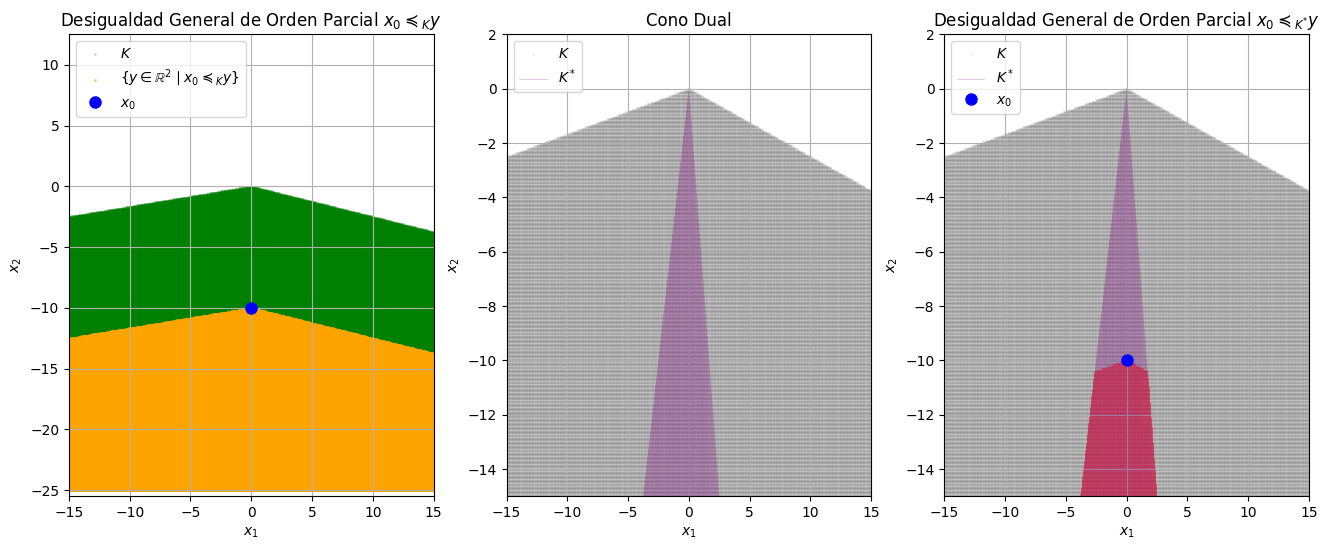

In [18]:
# Definimos los Vectores con los que construimos el conjunto de un Cono Convexo

v1 = np.array([-6, -1])
v2 = np.array([8, -2])

# Definimos los Puntos del Espacio

x = np.linspace(-25, 25, 1000)
y = np.linspace(-25, 25, 1000)
X, Y = np.meshgrid(x, y)

XY = np.stack([X.ravel(), Y.ravel()], axis = 1)

# Obtenemos el Dominio del Cono Convexo

V = np.column_stack((v1, v2)) 
V_inv = np.linalg.inv(V)

thetas = V_inv @ XY.T

mask_cone = (thetas[0, :] >= 0) & (thetas[1, :] >= 0)

Z_cone = mask_cone.reshape(X.shape)

X_cone_points = X[Z_cone]
Y_cone_points = Y[Z_cone]

# Definimos el Vector x 

x0 = np.array([0, -10])

# Obtenemos los Vectores que cumple con la desigualdad de orden parcial

XY_shifted = XY - x0.reshape(1, 2)

thetas_shifted = V_inv @ XY_shifted.T

mask_geneal_inequealities = (thetas_shifted[0, :] >= 0) & (thetas_shifted[1, :] >= 0)

Z_geneal_inequealities = mask_geneal_inequealities.reshape(X.shape)

X_geneal_inequealities= X[Z_geneal_inequealities]
Y_geneal_inequealities = Y[Z_geneal_inequealities]

# Obtenemos el Dominio del Cono Dual

x_dual = np.linspace(-15, 15, 1000)
y_dual = np.linspace(-15, 15, 1000)
X_dual, Y_dual = np.meshgrid(x_dual, y_dual)

XY_dual = np.stack([X_dual.ravel(), Y_dual.ravel()], axis = 1)

mask_dual_cone = (XY_dual @ v1 >= 0) & (XY_dual @ v2 >= 0)

Z_dual_cone = mask_dual_cone.reshape(X_dual.shape)

X_dual_points = X_dual[Z_dual_cone]
Y_dual_points = Y_dual[Z_dual_cone]

# Obtenemos los Vectores que cumple con la desigualdad de orden parcial del cono dual

mask_dual_cone_same_grid = (XY @ v1 >= 0) & (XY @ v2 >= 0)

mask_combined = mask_dual_cone_same_grid & mask_geneal_inequealities

Z_combined = mask_combined.reshape(X.shape)

# Visualizamos 

fig, axes = plt.subplots(1, 3, figsize = (16, 6))

axes[0].scatter(X_cone_points, Y_cone_points, color = 'green', alpha = 0.2, s = 1, label = r"$K$")
axes[0].scatter(X_geneal_inequealities, Y_geneal_inequealities, color = 'orange', alpha = 0.5, s = 1, label=r"$\{ y \in \mathbb{R}^2 \mid x_0 \preceq_K y \}$")
axes[0].plot(x0[0], x0[1], 'bo', label = r"$x_0$", markersize = 8)
axes[0].set_title(r"Desigualdad General de Orden Parcial $x_0 \preceq_K y$")
axes[0].axis("equal")
axes[0].set_xlim(-15, 15)
axes[0].set_ylim(-15, 2)
axes[0].grid(True)
axes[0].set_xlabel('$x_1$')
axes[0].set_ylabel('$x_2$')
axes[0].legend(loc = "upper left")

axes[1].scatter(X_cone_points, Y_cone_points, color = 'gray', alpha = 0.1, s = 1, label = r"$K$")
axes[1].plot(X_dual_points, Y_dual_points, color = 'purple', alpha = 0.3, linestyle = '-', linewidth = 0.5, label = r"$K^*$")
axes[1].set_title("Cono Dual")
axes[1].set_xlim(-15, 15)
axes[1].set_ylim(-15, 2)
axes[1].set_xlabel('$x_1$')
axes[1].set_ylabel('$x_2$')
axes[1].grid(True)
axes[1].legend(loc = "upper left")

axes[2].scatter(X_cone_points, Y_cone_points, color = 'gray', alpha = 0.1, s = 1, label = r"$K$")
axes[2].plot(X_dual_points, Y_dual_points, color = 'purple', alpha = 0.3, linestyle = '-', linewidth = 0.5, label = r"$K^*$")
axes[2].plot(x0[0], x0[1], 'bo', label = r"$x_0$", markersize = 8)
axes[2].contourf(X, Y, Z_combined, levels = [0.5, 1], colors = ['red'], alpha = 0.5)
axes[2].set_title(r"Desigualdad General de Orden Parcial $x_0 \preceq_{K^{*}} y$")
axes[2].set_xlim(-15, 15)
axes[2].set_ylim(-15, 2)
axes[2].set_xlabel('$x_1$')
axes[2].set_ylabel('$x_2$')
axes[2].grid(True)
axes[2].legend(loc = "upper left")

plt.show()

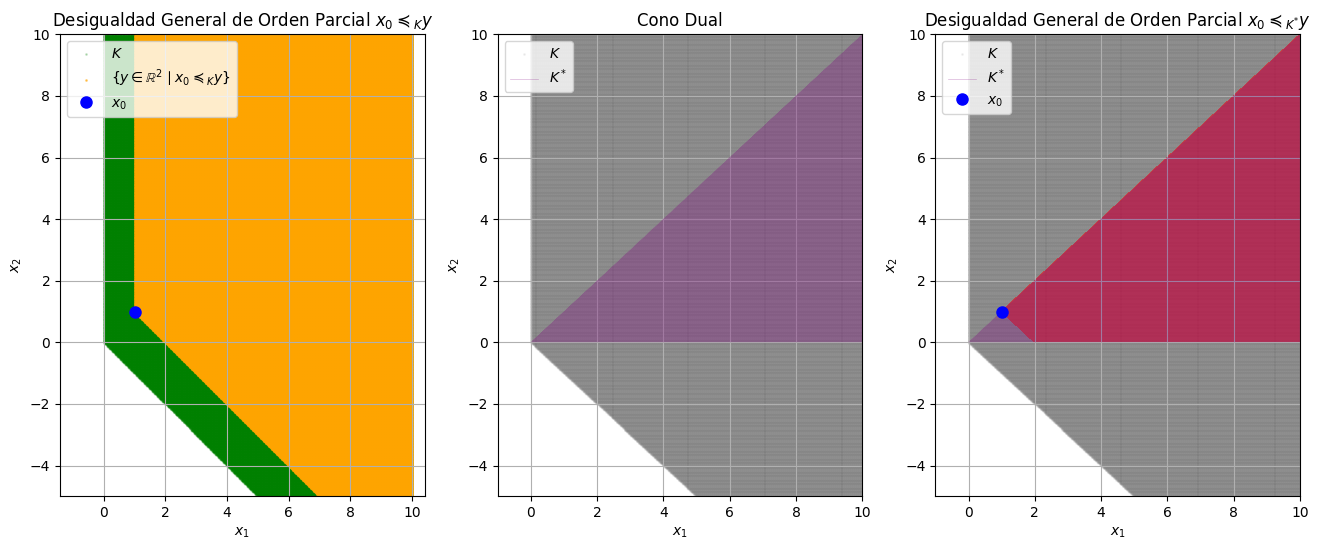

In [19]:
# Definimos los Puntos del Espacio

x = np.linspace(-10, 10, 1000)
y = np.linspace(-10, 10, 1000)
X, Y = np.meshgrid(x, y)

XY = np.stack([X.ravel(), Y.ravel()], axis=1)

# Obtenemos el Dominio del Cono Convexo

t_vals = np.linspace(0, 1, 100)
P_vals = np.array([XY[:, 0] + XY[:, 1] * t for t in t_vals])

mask_cone = np.all(P_vals >= 0, axis = 0)

Z_cone = mask_cone.reshape(X.shape)

X_cone_points = X[Z_cone]
Y_cone_points = Y[Z_cone]

# Definimos el Vector x 

x0 = np.array([1, 1])

# Obtenemos los Vectores que cumple con la desigualdad de orden parcial

v1 = np.array([2, -2]) 
v2 = np.array([0, 2]) 

V = np.column_stack((v1, v2)) 
V_inv = np.linalg.inv(V)

XY_shifted = XY - x0.reshape(1, 2)

thetas_shifted = V_inv @ XY_shifted.T

mask_geneal_inequealities = (thetas_shifted[0, :] >= 0) & (thetas_shifted[1, :] >= 0)

Z_geneal_inequealities = mask_geneal_inequealities.reshape(X.shape)

X_geneal_inequealities= X[Z_geneal_inequealities]
Y_geneal_inequealities = Y[Z_geneal_inequealities]

# Obtenemos el Dominio del Cono Dual

x_dual = np.linspace(-15, 15, 1000)
y_dual = np.linspace(-15, 15, 1000)
X_dual, Y_dual = np.meshgrid(x_dual, y_dual)

XY_dual = np.stack([X_dual.ravel(), Y_dual.ravel()], axis = 1)

mask_dual_cone = (XY_dual @ v1 >= 0) & (XY_dual @ v2 >= 0)

Z_dual_cone = mask_dual_cone.reshape(X_dual.shape)

X_dual_points = X_dual[Z_dual_cone]
Y_dual_points = Y_dual[Z_dual_cone]

# Obtenemos los Vectores que cumple con la desigualdad de orden parcial del cono dual

mask_dual_cone_same_grid = (XY @ v1 >= 0) & (XY @ v2 >= 0)

mask_combined = mask_dual_cone_same_grid & mask_geneal_inequealities

Z_combined = mask_combined.reshape(X.shape)

# Visualizamos 

fig, axes = plt.subplots(1, 3, figsize = (16, 6))

axes[0].scatter(X_cone_points, Y_cone_points, color = 'green', alpha = 0.2, s = 1, label= r"$K$")
axes[0].scatter(X_geneal_inequealities, Y_geneal_inequealities, color = 'orange', alpha = 0.5, s = 1, label=r"$\{ y \in \mathbb{R}^2 \mid x_0 \preceq_K y \}$")
axes[0].plot(x0[0], x0[1], 'bo', label = r"$x_0$", markersize = 8)
axes[0].set_title(r"Desigualdad General de Orden Parcial $x_0 \preceq_K y$")
axes[0].axis("equal")
axes[0].set_xlim(-1, 10)
axes[0].set_ylim(-5, 10)
axes[0].grid(True)
axes[0].set_xlabel('$x_1$')
axes[0].set_ylabel('$x_2$')
axes[0].legend(loc = "upper left")

axes[1].scatter(X_cone_points, Y_cone_points, color = 'gray', alpha = 0.1, s = 1, label = r"$K$")
axes[1].plot(X_dual_points, Y_dual_points, color = 'purple', alpha = 0.3, linestyle = '-', linewidth = 0.5, label = r"$K^*$")
axes[1].set_title("Cono Dual")
axes[1].set_xlim(-1, 10)
axes[1].set_ylim(-5, 10)
axes[1].set_xlabel('$x_1$')
axes[1].set_ylabel('$x_2$')
axes[1].grid(True)
axes[1].legend(loc = "upper left")

axes[2].scatter(X_cone_points, Y_cone_points, color = 'gray', alpha = 0.1, s = 1, label = r"$K$")
axes[2].plot(X_dual_points, Y_dual_points, color = 'purple', alpha = 0.3, linestyle = '-', linewidth = 0.5, label = r"$K^*$")
axes[2].plot(x0[0], x0[1], 'bo', label = r"$x_0$", markersize = 8)
axes[2].contourf(X, Y, Z_combined, levels = [0.5, 1], colors = ['red'], alpha = 0.5)
axes[2].set_title(r"Desigualdad General de Orden Parcial $x_0 \preceq_{K^{*}} y$")
axes[2].set_xlim(-1, 10)
axes[2].set_ylim(-5, 10)
axes[2].set_xlabel('$x_1$')
axes[2].set_ylabel('$x_2$')
axes[2].grid(True)
axes[2].legend(loc = "upper left")

plt.show()

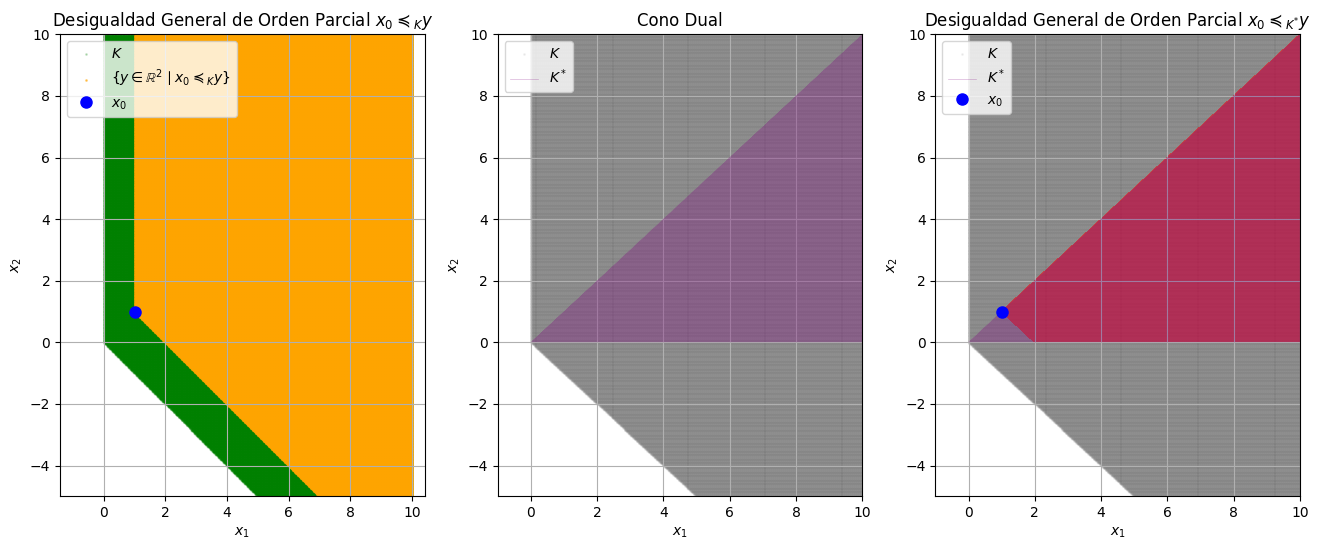

In [20]:
# Definimos los Puntos del Espacio

x = np.linspace(-10, 10, 1000)
y = np.linspace(-10, 10, 1000)
X, Y = np.meshgrid(x, y)

XY = np.stack([X.ravel(), Y.ravel()], axis=1)

# Obtenemos el Dominio del Cono Convexo

t_vals = np.linspace(0, 1, 100)
P_vals = np.array([XY[:, 0] + XY[:, 1] * t for t in t_vals])

mask_cone = np.all(P_vals >= 0, axis = 0)

Z_cone = mask_cone.reshape(X.shape)

X_cone_points = X[Z_cone]
Y_cone_points = Y[Z_cone]

# Definimos el Vector x 

x0 = np.array([1, 1])

# Obtenemos los Vectores que cumple con la desigualdad de orden parcial

v1 = np.array([2, -2]) 
v2 = np.array([0, 2]) 

V = np.column_stack((v1, v2)) 
V_inv = np.linalg.inv(V)

XY_shifted = XY - x0.reshape(1, 2)

thetas_shifted = V_inv @ XY_shifted.T

mask_geneal_inequealities = (thetas_shifted[0, :] >= 0) & (thetas_shifted[1, :] >= 0)

Z_geneal_inequealities = mask_geneal_inequealities.reshape(X.shape)

X_geneal_inequealities= X[Z_geneal_inequealities]
Y_geneal_inequealities = Y[Z_geneal_inequealities]

# Obtenemos el Dominio del Cono Dual

x_dual = np.linspace(-15, 15, 1000)
y_dual = np.linspace(-15, 15, 1000)
X_dual, Y_dual = np.meshgrid(x_dual, y_dual)

XY_dual = np.stack([X_dual.ravel(), Y_dual.ravel()], axis = 1)

mask_dual_cone = (XY_dual @ v1 >= 0) & (XY_dual @ v2 >= 0)

Z_dual_cone = mask_dual_cone.reshape(X_dual.shape)

X_dual_points = X_dual[Z_dual_cone]
Y_dual_points = Y_dual[Z_dual_cone]

# Obtenemos los Vectores que cumple con la desigualdad de orden parcial del cono dual

mask_dual_cone_same_grid = (XY @ v1 >= 0) & (XY @ v2 >= 0)

mask_combined = mask_dual_cone_same_grid & mask_geneal_inequealities

Z_combined = mask_combined.reshape(X.shape)

# Visualizamos 

fig, axes = plt.subplots(1, 3, figsize = (16, 6))

axes[0].scatter(X_cone_points, Y_cone_points, color = 'green', alpha = 0.2, s = 1, label= r"$K$")
axes[0].scatter(X_geneal_inequealities, Y_geneal_inequealities, color = 'orange', alpha = 0.5, s = 1, label=r"$\{ y \in \mathbb{R}^2 \mid x_0 \preceq_K y \}$")
axes[0].plot(x0[0], x0[1], 'bo', label = r"$x_0$", markersize = 8)
axes[0].set_title(r"Desigualdad General de Orden Parcial $x_0 \preceq_K y$")
axes[0].axis("equal")
axes[0].set_xlim(-1, 10)
axes[0].set_ylim(-5, 10)
axes[0].grid(True)
axes[0].set_xlabel('$x_1$')
axes[0].set_ylabel('$x_2$')
axes[0].legend(loc = "upper left")

axes[1].scatter(X_cone_points, Y_cone_points, color = 'gray', alpha = 0.1, s = 1, label = r"$K$")
axes[1].plot(X_dual_points, Y_dual_points, color = 'purple', alpha = 0.3, linestyle = '-', linewidth = 0.5, label = r"$K^*$")
axes[1].set_title("Cono Dual")
axes[1].set_xlim(-1, 10)
axes[1].set_ylim(-5, 10)
axes[1].set_xlabel('$x_1$')
axes[1].set_ylabel('$x_2$')
axes[1].grid(True)
axes[1].legend(loc = "upper left")

axes[2].scatter(X_cone_points, Y_cone_points, color = 'gray', alpha = 0.1, s = 1, label = r"$K$")
axes[2].plot(X_dual_points, Y_dual_points, color = 'purple', alpha = 0.3, linestyle = '-', linewidth = 0.5, label = r"$K^*$")
axes[2].plot(x0[0], x0[1], 'bo', label = r"$x_0$", markersize = 8)
axes[2].contourf(X, Y, Z_combined, levels = [0.5, 1], colors = ['red'], alpha = 0.5)
axes[2].set_title(r"Desigualdad General de Orden Parcial $x_0 \preceq_{K^{*}} y$")
axes[2].set_xlim(-1, 10)
axes[2].set_ylim(-5, 10)
axes[2].set_xlabel('$x_1$')
axes[2].set_ylabel('$x_2$')
axes[2].grid(True)
axes[2].legend(loc = "upper left")

plt.show()